## EXERCISES_RLAB06

#### REZA RAJAEE (2040483)

In [1]:
library(rjags)
library(matlib)
library(bayestestR)
options(warn=-1)

Loading required package: coda

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs



## Exercise 1
#### • a well established and diffused method for detecting a disease in blood fails to detect the presence of disease in 15% of the patients that actually have the disease.
#### • A young UniPD startUp has developed an innovative method of screening. During the qualification phase, a random sample of n = 75 patients known to have the disease is screened using the new method.
#### (a) what is the probability distribution of y, the number of times the new method fails to detect the disease ?

In [3]:
### in each trial probability to fail is a Bernoulli process and we khow the sum of them follows 
### binomial distribution, so the probability distribution of y is binomial with size=75 and prob=y/75.


#### (b) on the n = 75 patients sample, the new method fails to detect the disease in y = 6 cases. What is the frequentist estimator of the failure probability of the new method ?

In [4]:
### Frequentist estimator is pˆF =y/n
### Var[pˆF ] = p(1 − p)/n = pq/n
### MSE [pˆF] = Bias[pF,p]^2+ Var[pF ]= 0 +p(1 − p)/n
y <- 6
n<-75
p_F <- y/n
cat("Frequentist estimator is: ",p_F,"\n\n")
cat("var[pˆF] and MSE [pˆF] are same : ",p_F*(1-p_F)/n)

Frequentist estimator is:  0.08 

var[pˆF] and MSE [pˆF] are same :  0.0009813333

#### (c) setup a bayesian computation of the posterior probability, assuming a beta distribution with mean value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot the mean value and variance

Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“"size" is not a graphical parameter”


mean is:  0.08478674 

variance is:  0.0009520625

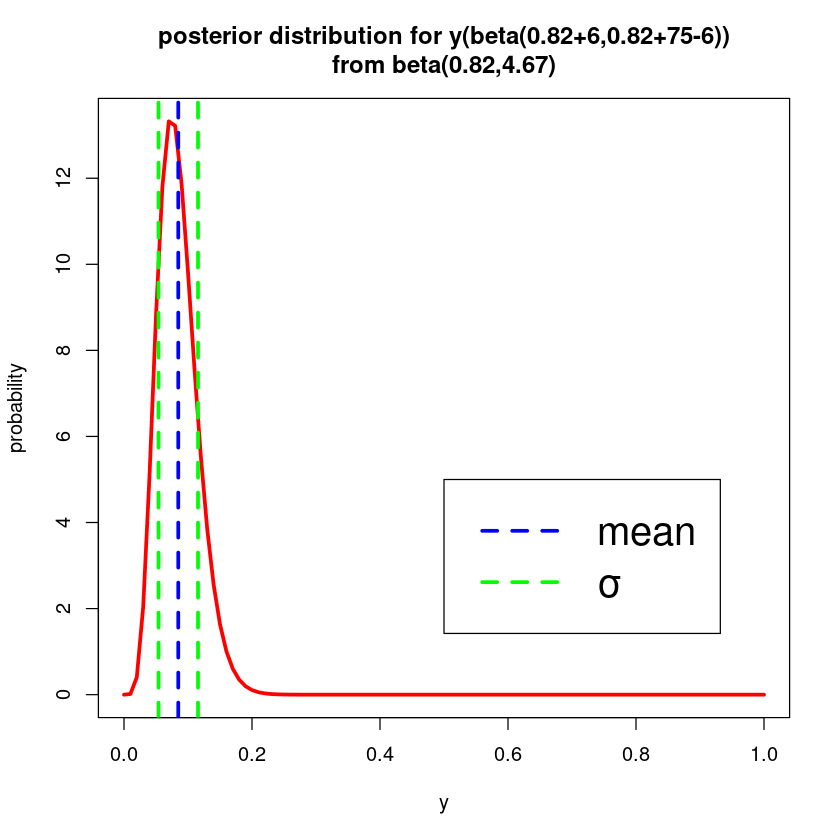

In [5]:
### our posterior distribution is given by a Beta distribution. since a Beta prior is a 
### conjugate function for the Binomial distribution. Beta prior with a mean value m = 0.15 and a
### standard deviation σ = 0.14. Since m = a/a + b  and σ^2 = ab/(a + b)^2*(a + b + 1)
### use solve() to find the a and b from:  a + b =1-(m(1-m)/σ^2)  a(m-1)+mb =0  

m <- 0.15
sigma <- 0.14
A <- rbind(c(1, 1),c(m-1, m)) ## coefficients of the equations
B <- c(((m*(1-m))/(sigma**2))-1, 0) ## vector of the equations
a <- solve(A,B)[1]
b <- solve(A,B)[2]

aa <- a+y ## a'
bb <- b+n-y ## b'
post <- function(x){
    return(dbeta(x, aa, bb))  ### posterior distribution is Beta(a'= a + y, b'= b + n − y) 
}

mean <- aa/(aa+bb) ### m = a'/(a'+b')
var <- (aa*bb)/(((aa+bb)**2)*(aa+bb+1)) ### σ^2 = a'b'/(a'+b')^2*(a'+b'+1)

x <- seq(0,1,0.01)
plot(x,post(x), type='l',xlab='y',ylab='probability',lwd=3, col ='red',
     main = sprintf ("posterior distribution for y(beta(0.82+6,0.82+75-6))\nfrom beta(0.82,4.67)"))
abline(v = mean, lty = 2, lwd=3, col = 'blue',size = 2)
abline(v = sqrt(var)+mean, lty = 2, lwd=3, col = 'green')
abline(v = -sqrt(var)+mean, lty = 2, lwd=3, col = 'green')
legend(0.5,5,c('mean','σ'), col=c('blue','green'),lty=2, cex=2, lwd=3)

cat("mean is: ",mean,"\n\n")
cat("variance is: ",var)

#### (d) Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test the sample at a 5% level of significance in the Bayesian way.

In [6]:
### we evaluate the posterior probability of the null hypothesis, and integrate over the required region
pvalue <- integrate(post,lower=0,upper=0.15) 
cat("p_value is (bayesian approach):" ,pvalue$value)

### p_value 996.87% is higher than α = 5%, 
## therefore we cannot reject the null hypothesis at the 5% level of significance

p_value is (bayesian approach): 0.9687207

#### (e) Perform the same hypothesis test in the classical frequentist way.


	Exact binomial test

data:  y and n
number of successes = 6, number of trials = 75, p-value = 0.9766
alternative hypothesis: true probability of success is greater than 0.15
95 percent confidence interval:
 0.03541307 1.00000000
sample estimates:
probability of success 
                  0.08 


[1] 0.97658

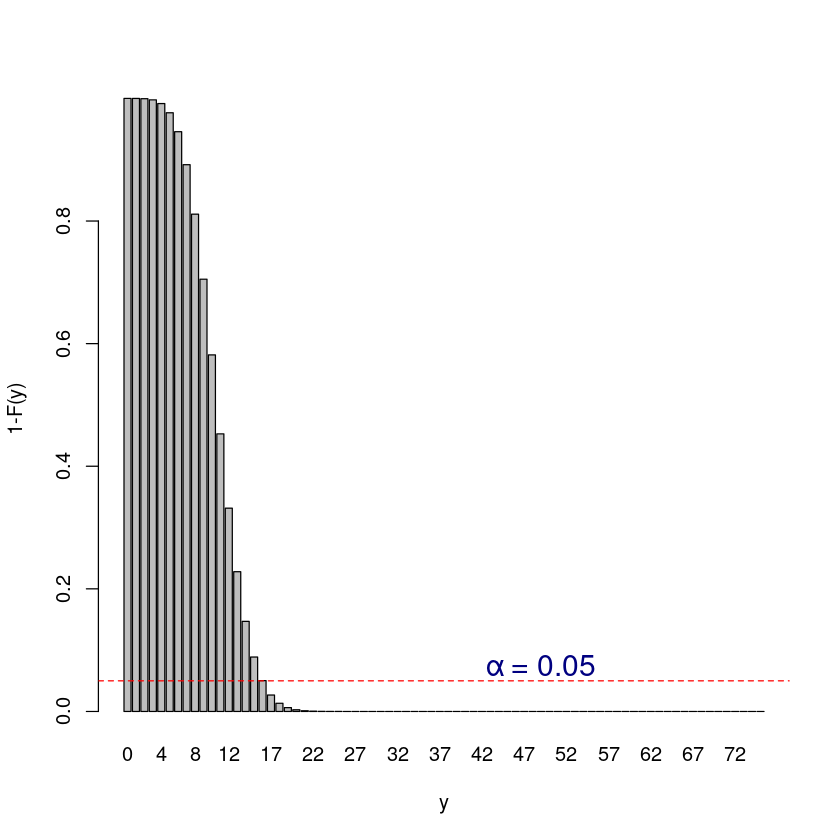

In [8]:
binom.test(y, n, 0.15,"greater", 0.95)

### probability of failing to the detect the desease in ill patients is 0.08 
### so new test is better than the traditional method

p_value<-sum(dbinom(6:35,75,0.15))
p_value

x <- seq(0,75,1)
barplot(1-pbinom(x, n, 0.15), names.arg=x, xlab='y',ylab='1-F(y)')
abline(h=0.05,lty = 2, col = 'red')
text(50,0.07, col='navy', lwd = 2, pos=4, cex=1.5,paste("α = 0.05"))

### y=6 lies in the acceptance region

## Exercise 2
#### • Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the Poisson distribution can be very useful in applied statistics when describing low-frequency events in a large population. In a famous example he showed that the number of deaths by horse kick among the Prussian army follows the Poisson distribution.
#### • Considering the following to sets of observations taken over a fixed large time interval in two different corps:

| y death soldiers | 0 | 1 | 2 | 3 | 4 | ≥ 5 |
| --- | --- | --- | --- | --- | --- | --- |
| $n_1$ observations | 109 | 65 | 22 | 3 | 1 | 0 |
| $n_2$ observations | 144 | 91 | 32 | 11 | 2 | 0 |

#### (a) assuming a uniform prior, compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.

𝑛1  observations: 

the mean is:  33.5 
the median is:  33.44446 
the variance is:  5.583333 
95% credibility interval:  30.6896 - 36.36471 

𝑛2  observations: 

the mean is:  46.83333 
the median is:  46.77779 
the variance is:  7.805556 
95% credibility interval:  43.50472 - 50.21626 



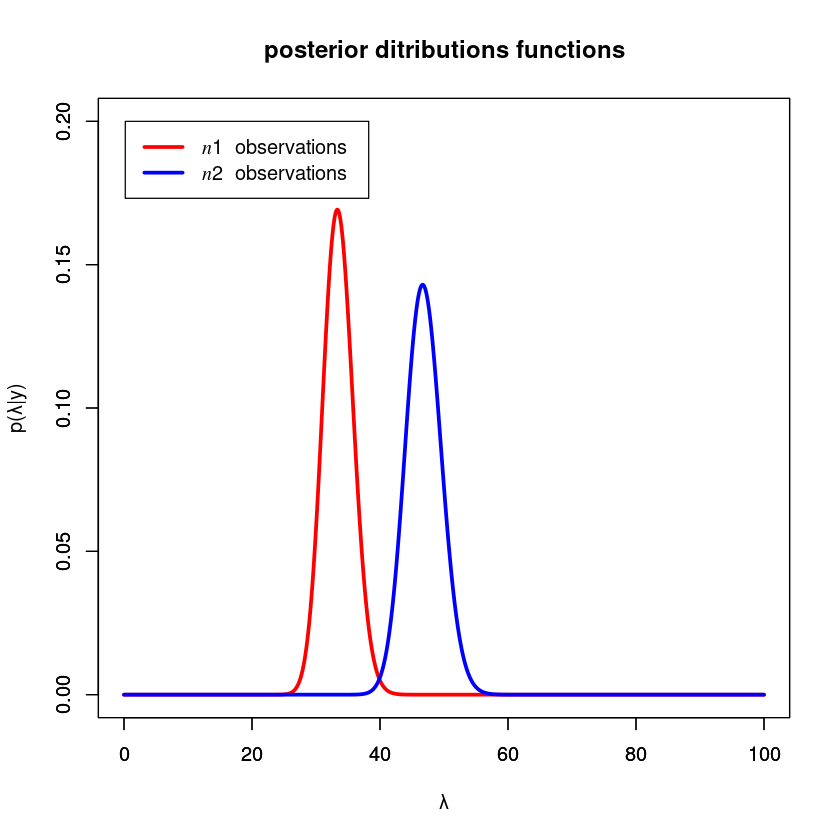

In [7]:
###  Likelihood for a Poisson process : multiple independent  measurements of a posson procees similar 
### to the Gamma distribution function with α=Y+1 that (Y1=200 ,Y2=280) and (rate=6).

### for a uniform prior we have g(λ) = 1 for λ > 0. so for posterior for multiple poisson process in this case 
## we have: the gamma distribution with α=Y+1 that (Y1=200 ,Y2=280) and (rate=6).

y1 <- 200
y2 <- 280
lambda <- 6

pos1 <- function(x){
    return(dgamma(x, shape = y1+1, rate = lambda))
}

pos2 <- function(x){
    return(dgamma(x, shape = y2+1, rate = lambda))
}

x <- seq(0,100,0.01) ## rnage x 

plot(x,pos1(x), type='l',xlab='λ',ylab='p(λ|y)',lwd=3, col ='red',
     main = sprintf (" posterior ditributions functions "),ylim=range(0,0.2))
legend(0.2,0.2,c('𝑛1  observations','𝑛2  observations'), col=c('red','blue'),lty=1, cex=1, lwd=3)
par(new=TRUE)
plot(x,pos2(x), type='l',xlab=' ',ylab=' ',lwd=3, col ='blue',ylim=range(0,0.2))

### also for mean and variance for a gamma distribution with shape=α=(201,281) and shape=λ=6 we have:
### mean = α/λ = (33.5 , 46.833)  , variance = α/λ^2 = (5.58 , 7.80)

### 𝑛1  observations

median1 <- qgamma(0.5, shape = y1+1, rate = lambda) ### we find the k, where P(x<k)=0.5 
mean1 <- (y1+1)/lambda
variance1 <- (y1+1)/(lambda**2) 
ci1 <- ci(distribution_gamma(lambda, shape=y1+1, scale = 1/lambda, random = FALSE), method = "ETI")

### 𝑛2  observations

median2 <- qgamma(0.5, shape = y2+1, rate = lambda) ### we find the k, where P(x<k)=0.5
mean2 <- (y2+1)/lambda
variance2 <- (y2+1)/(lambda**2) 
ci2 <- ci(distribution_gamma(lambda, shape=y2+1, scale = 1/lambda, random = FALSE), method = "ETI")


cat("𝑛1  observations: \n\n")
cat("the mean is: ",mean1,'\n')
cat("the median is: ",median1,'\n')
cat("the variance is: ",variance1,'\n')
cat("95% credibility interval: ",ci1$CI_low,"-",ci1$CI_high,'\n\n')

cat("𝑛2  observations: \n\n")
cat("the mean is: ",mean2,'\n')
cat("the median is: ",median2,'\n')
cat("the variance is: ",variance2,'\n')
cat("95% credibility interval: ",ci2$CI_low,"-",ci2$CI_high,'\n\n')

#### (b) assuming now a Jeffreys’ prior,
$$ g(λ) ∝ 1/\sqrt{λ} , with λ > 0$$
#### compute and plot the posterior distribution for λ, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.

𝑛1  observations: 

the mean is:  33.41667 
the median is:  33.36113 
the variance is:  5.569444 
95% credibility interval:  30.60981 - 36.27784 

𝑛2  observations: 

the mean is:  46.75 
the median is:  46.69446 
the variance is:  7.791667 
95% credibility interval:  43.42438 - 50.12993 



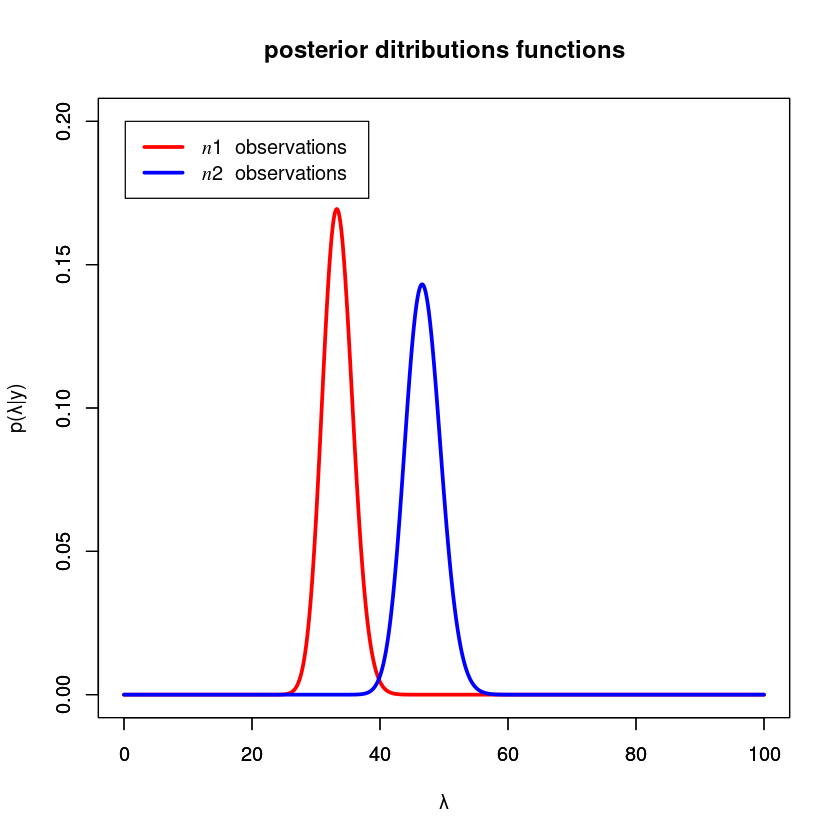

In [8]:
###  Likelihood for a Poisson process : multiple independent  measurements of a posson procees similar 
### to the Gamma distribution function with α=Y+1 that (Y1=200 ,Y2=280) and (rate=6).

### for Jeffreys’ prior, we have g(λ) = 1/sqrt(λ), for λ > 0. so for posterior for multiple poisson process in this case 
## we have: the gamma distribution with α=Y+1/2 that (Y1=200 ,Y2=280) and (rate=6).

y1 <- 200
y2 <- 280
lambda <- 6

pos1 <- function(x){
    return(dgamma(x, shape = y1+0.5, rate = lambda))
}

pos2 <- function(x){
    return(dgamma(x, shape = y2+0.5, rate = lambda))
}

x <- seq(0,100,0.01) ## rnage x 

plot(x,pos1(x), type='l',xlab='λ',ylab='p(λ|y)',lwd=3, col ='red',
     main = sprintf (" posterior ditributions functions "),ylim=range(0,0.2))
legend(0.2,0.2,c('𝑛1  observations','𝑛2  observations'), col=c('red','blue'),lty=1, cex=1, lwd=3)
par(new=TRUE)
plot(x,pos2(x), type='l',xlab=' ',ylab=' ',lwd=3, col ='blue',ylim=range(0,0.2))

### also for mean and variance for a gamma distribution with shape=α=(201,281) and shape=λ=6 we have:
### mean = α/λ = (33.5 , 46.833)  , variance = α/λ^2 = (5.58 , 7.80)

### 𝑛1  observations

median1 <- qgamma(0.5, shape = y1+0.5, rate = lambda) ### we find the k, where P(x<k)=0.5 
mean1 <- (y1+0.5)/lambda
variance1 <- (y1+0.5)/(lambda**2) 
ci1 <- ci(distribution_gamma(lambda, shape=y1+0.5, scale = 1/lambda, random = FALSE), method = "ETI")

### 𝑛2  observations

median2 <- qgamma(0.5, shape = y2+1/2, rate = lambda) ### we find the k, where P(x<k)=0.5
mean2 <- (y2+0.5)/lambda
variance2 <- (y2+0.5)/(lambda**2) 
ci2 <- ci(distribution_gamma(lambda, shape=y2+0.5, scale = 1/lambda, random = FALSE), method = "ETI")


cat("𝑛1  observations: \n\n")
cat("the mean is: ",mean1,'\n')
cat("the median is: ",median1,'\n')
cat("the variance is: ",variance1,'\n')
cat("95% credibility interval: ",ci1$CI_low,"-",ci1$CI_high,'\n\n')

cat("𝑛2  observations: \n\n")
cat("the mean is: ",mean2,'\n')
cat("the median is: ",median2,'\n')
cat("the variance is: ",variance2,'\n')
cat("95% credibility interval: ",ci2$CI_low,"-",ci2$CI_high,'\n\n')

## Exercise 3
#### • A study on water quality of streams, a high level of bacter X was defined as a level greater than 100 per 100 ml of stream water. n = 116 samples were taken from streams having a high environmental impact on pandas. Out of these, y = 11 had a high bacter X level.
#### • indicating with p the probability that a sample of water taken from the stream has a high bacter X level,
#### (a) find the frequentist estimator for p

In [9]:
### Frequentist estimator is pˆF =y/n
### Var[pˆF ] = p(1 − p)/n = pq/n
### MSE [pˆF] = Bias[pF,p]^2+ Var[pF ]= 0 +p(1 − p)/n
n1 <- 116
y1 <- 11
p_F1 <- y1/n1
cat("Frequentist estimator is: ",p_F1,"\n\n")
cat("var[pˆF] and MSE [pˆF] are same : ",p_F1*(1-p_F1)/n1)


Frequentist estimator is:  0.09482759 

var[pˆF] and MSE [pˆF] are same :  0.0007399596

#### (b) using a Beta(1, 10) prior for p, calculate and posterior distribution P(p|y)

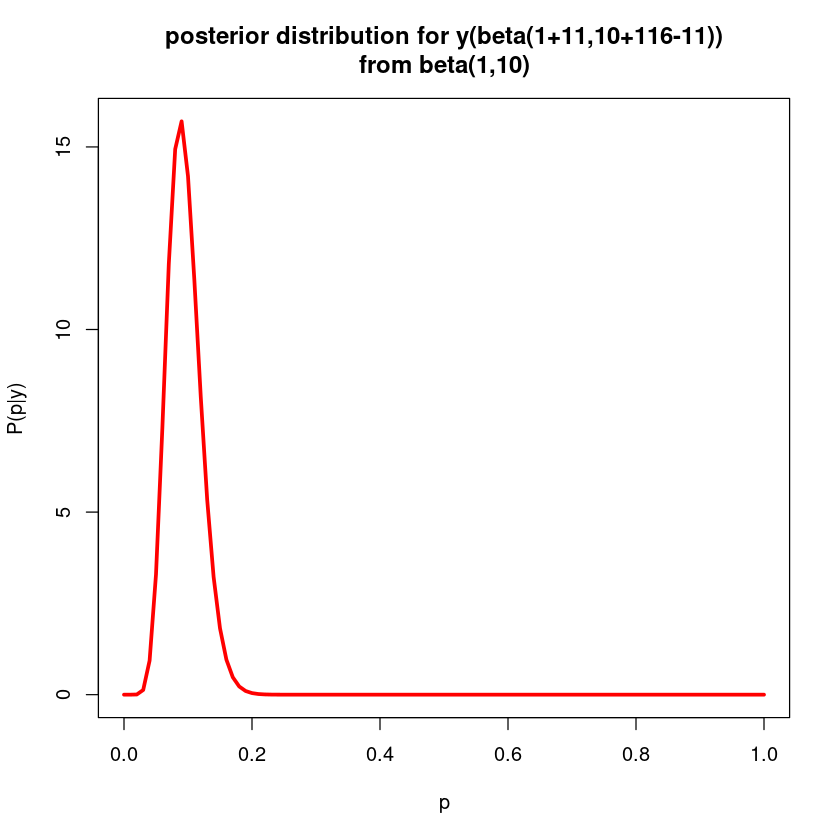

In [10]:
### in each sample probability to high bacter X level is a Bernoulli process and we khow the sum of them follows 
### binomial distribution, so the probability distribution of y is binomial with size=116 and prob=y/116.
### our posterior distribution is given by a Beta distribution. since a Beta prior is a 
### conjugate function for the Binomial distribution. Beta prior with a=1, b=10 gives posterior 
### Beta(a'= a + y, b'= b + n − y)    

a <- 1
b <- 10

aa <- a+y1 ## a'
bb <- b+n1-y1 ## b'
post <- function(x){
    return(dbeta(x, aa, bb))  ### posterior distribution is Beta(a'= a + y, b'= b + n − y) 
}


x <- seq(0,1,0.01)
plot(x,post(x), type='l',xlab='p',ylab='P(p|y)',lwd=3, col ='red',
     main = sprintf ("posterior distribution for y(beta(1+11,10+116-11))\nfrom beta(1,10)"))

#### (c) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

In [11]:
mean <- aa/(aa+bb) ### m = a'/(a'+b')
var <- (aa*bb)/(((aa+bb)**2)*(aa+bb+1)) ### σ^2 = a'b'/(a'+b')^2*(a'+b'+1)
cat("the posterior mean is: ",mean,"\n\n")
cat("variance is: ",var,"\n\n")

ci_b <- ci(distribution_beta(n, aa, bb, random = FALSE), method = "ETI")

cat("95% credibility interval:" ,ci_b$CI_low,"-",ci_b$CI_high)

the posterior mean is:  0.09448819 

variance is:  0.0006684388 



ERROR: Error in ci(distribution_beta(n, aa, bb, random = FALSE), method = "ETI"): could not find function "ci"


#### (d) test the hypotesis H◦ : p = 0.1 versus H1 : p != 0.1 at 5% level of significance with both the frequentist and bayesian approach

p_value is (bayesian approach): 0.614185


	Exact binomial test

data:  y1 and n1
number of successes = 11, number of trials = 116, p-value = 1
alternative hypothesis: true probability of success is not equal to 0.1
95 percent confidence interval:
 0.04829409 0.16333954
sample estimates:
probability of success 
            0.09482759 


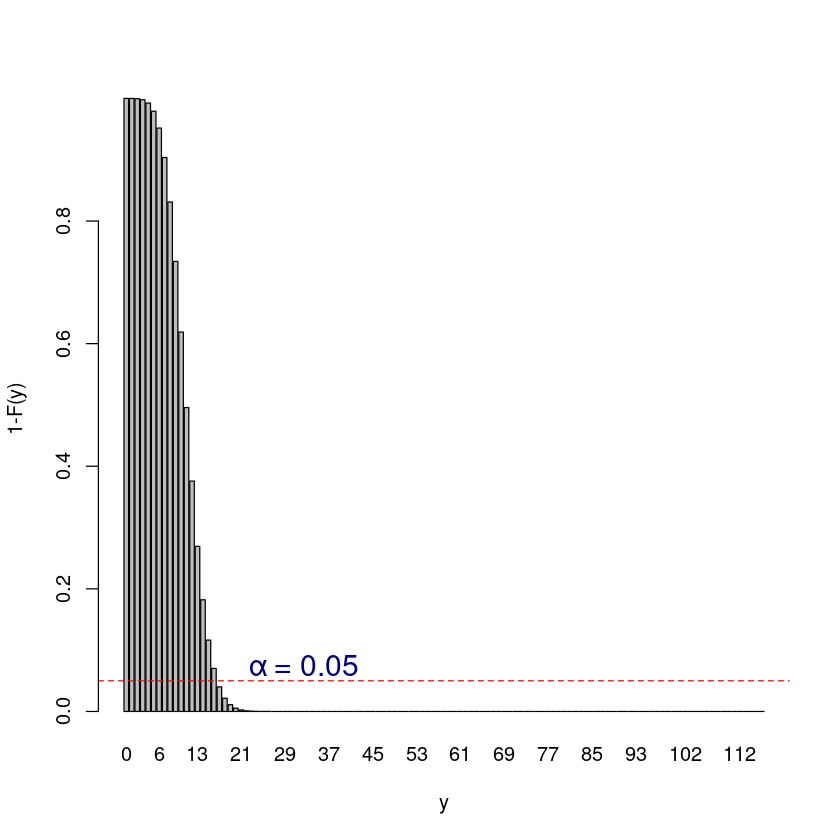

In [13]:
## bayesian approach
### we evaluate the posterior probability of the null hypothesis, and integrate over the required region
pvalue <- integrate(post,lower=0,upper=0.1) 
cat("p_value is (bayesian approach):" ,pvalue$value)

### p_value 61.41% is higher than α = 5%, 
## therefore we cannot reject the null hypothesis at the 5% level of significance


## frequentist approach

binom.test(y1, n1, 0.1,conf.level=0.95)
### so the hypotesis H0 is true

x <- seq(0,116,1)
barplot(1-pbinom(x, n1, 0.1), names.arg=x, xlab='y',ylab='1-F(y)')
abline(h=0.05,lty = 2, col = 'red')
text(25,0.07, col='navy', lwd = 2, pos=4, cex=1.5,paste("α = 0.05"))
### y=11 lies in the acceptance region


#### • a new measurement, performed one month later on n = 165 water samples, gives y = 9 high bacter X level
#### (e) find the frequentist estimator for p

In [13]:
### Frequentist estimator is pˆF =y/n
### Var[pˆF ] = p(1 − p)/n = pq/n
### MSE [pˆF] = Bias[pF,p]^2+ Var[pF ]= 0 +p(1 − p)/n
n2 <- 165
y2 <- 9
p_F2 <- y2/n2
cat("Frequentist estimator is: ",p_F2,"\n\n")
cat("var[pˆF] and MSE [pˆF] are same : ",p_F2*(1-p_F2)/n2)

Frequentist estimator is:  0.05454545 

var[pˆF] and MSE [pˆF] are same :  0.000312547

#### (f) find a bayesian estimator for p, assuming both a Beta(1, 10) prior for p, and assuming the posterior probability of the older measurement as the prior for the new one.

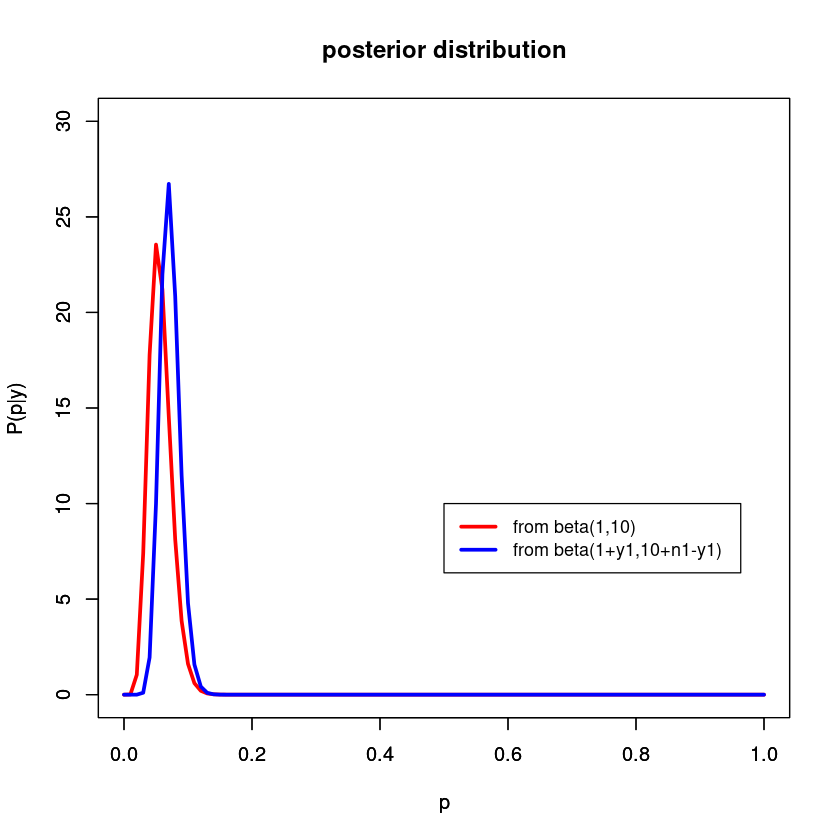

In [14]:
### in each sample probability to high bacter X level is a Bernoulli process and we khow the sum of them follows 
### binomial distribution, so the probability distribution of y is binomial with size=165 and prob=y/116.
### our posterior distribution is given by a Beta distribution. since a Beta prior is a 
### conjugate function for the Binomial distribution. Beta prior with a=1, b=10 gives posterior 
### Beta(a'= a + y, b'= b + n − y)    

### prior: beta(1,10)
a1 <- 1
b1 <- 10
aa1 <- a1+y2 ## a'
bb1 <- b1+n2-y2 ## b'
post1 <- function(x){
    return(dbeta(x, aa1, bb1))  ### posterior distribution is Beta(a'= a + y, b'= b + n − y) 
}

### prior: the posterior probability of the older measurement beta(1+y1,10+n1-y1)
a2 <- 1+y1
b2 <- 10+n1-y1
aa2 <- a2+y2 ## a'
bb2 <- b2+n2-y2 ## b'
post2 <- function(x){
    return(dbeta(x, aa2, bb2))  ### posterior distribution is Beta(a'= a + y, b'= b + n − y) 
}


x <- seq(0,1,0.01)
plot(x,post1(x), type='l',xlab='p',ylab='P(p|y)',lwd=3, col ='red',ylim=range(0,30),
     main = sprintf ("posterior distribution"))
legend(0.5,10,c('from beta(1,10)','from beta(1+y1,10+n1-y1)'), col=c('red','blue'),lty=1, cex=0.9, lwd=3)
par(new=TRUE)
plot(x,post2(x), type='l',xlab='p',ylab='P(p|y)',lwd=3, col ='blue',ylim=range(0,30))

#### (g) find the bayesian estimator for p, the posterior mean and variance, and a 95% credible interval

In [15]:
### prior: beta(1,10)
cat("prior: beta(1,10):\n\n" )
mean1 <- aa1/(aa1+bb1) ### m = a'/(a'+b')
var1 <- (aa1*bb1)/(((aa1+bb1)**2)*(aa1+bb1+1)) ### σ^2 = a'b'/(a'+b')^2*(a'+b'+1)
cat("the posterior mean is: ",mean1,"\n")
cat("variance is: ",var1,"\n")

ci_1 <- ci(distribution_beta(n2, aa1, bb1, random = FALSE), method = "ETI")

cat("95% credibility interval:" ,ci_1$CI_low,"-",ci_1$CI_high,"\n\n")

### prior: the posterior probability of the older measurement beta(1+y1,10+n1-y1)
cat("prior: the posterior probability of the older measurement beta(1+y1,10+n1-y1):\n\n" )
mean2 <- aa2/(aa2+bb2) ### m = a'/(a'+b')
var2 <- (aa2*bb2)/(((aa2+bb2)**2)*(aa2+bb2+1)) ### σ^2 = a'b'/(a'+b')^2*(a'+b'+1)
cat("the posterior mean is: ",mean2,"\n")
cat("variance is: ",var2,"\n")

ci_2 <- ci(distribution_beta(n2, aa2, bb2, random = FALSE), method = "ETI")

cat("95% credibility interval:" ,ci_2$CI_low,"-",ci_2$CI_high,"\n\n")

prior: beta(1,10):

the posterior mean is:  0.05681818 
variance is:  0.0003027677 
95% credibility interval: 0.02824907 - 0.09427879 

prior: the posterior probability of the older measurement beta(1+y1,10+n1-y1):

the posterior mean is:  0.07191781 
variance is:  0.0002278008 
95% credibility interval: 0.04574786 - 0.1032807 



#### (h) test the hypotesis H◦ : p = 0.1 versus H1 : p != 0.1 at 5% level of significance with both the frequentist and bayesian approach

p_value is (bayesian approach)(prior: beta(1,10)): 0.9842592 

p_value is (bayesian approach)(prior: beta(1+y1,10+n1-y1)): 0.9588299


	Exact binomial test

data:  y2 and n2
number of successes = 9, number of trials = 165, p-value = 0.05112
alternative hypothesis: true probability of success is not equal to 0.1
95 percent confidence interval:
 0.02524192 0.10101679
sample estimates:
probability of success 
            0.05454545 


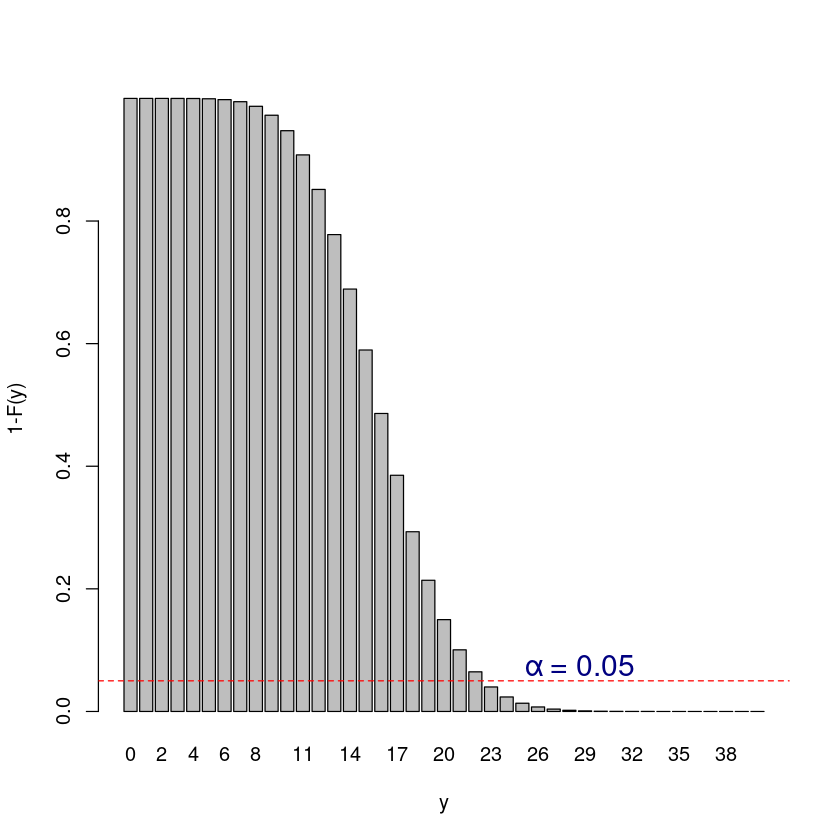

In [16]:
## bayesian approach
### we evaluate the posterior probability of the null hypothesis, and integrate over the required region
pvalue1 <- integrate(post1,lower=0,upper=0.1) 
cat("p_value is (bayesian approach)(prior: beta(1,10)):" ,pvalue1$value,"\n\n")
### p_value 98.42% is higher than α = 5%, 
## therefore we cannot reject the null hypothesis at the 5% level of significance

pvalue2 <- integrate(post2,lower=0,upper=0.1) 
cat("p_value is (bayesian approach)(prior: beta(1+y1,10+n1-y1)):" ,pvalue2$value)
### p_value 95.88% is higher than α = 5%, 
## therefore we cannot reject the null hypothesis at the 5% level of significance


## frequentist approach

binom.test(y2, n2, 0.1,conf.level=0.95)
### so the hypotesis H0 is true

x <- seq(0,40,1)
barplot(1-pbinom(x, n2, 0.1), names.arg=x, xlab='y',ylab='1-F(y)')
abline(h=0.05,lty = 2, col = 'red')
text(30,0.07, col='navy', lwd = 2, pos=4, cex=1.5,paste("α = 0.05"))
### y=9 lies in the acceptance region

## Exercise 4
#### • analyze the data of Exercise 1 using a MCMC with JAGS (solve only point a of Ex 1)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 2
   Total graph size: 6

Initializing model




Iterations = 11001:21000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

     Mean      SD  Naive SE Time-series SE
p 0.09117 0.03247 0.0003247      0.0004411
y 0.90220 0.96287 0.0096287      0.0098824

2. Quantiles for each variable:

     2.5%     25%     50%   75%  97.5%
p 0.03812 0.06728 0.08807 0.111 0.1642
y 0.00000 0.00000 1.00000 1.000 3.0000


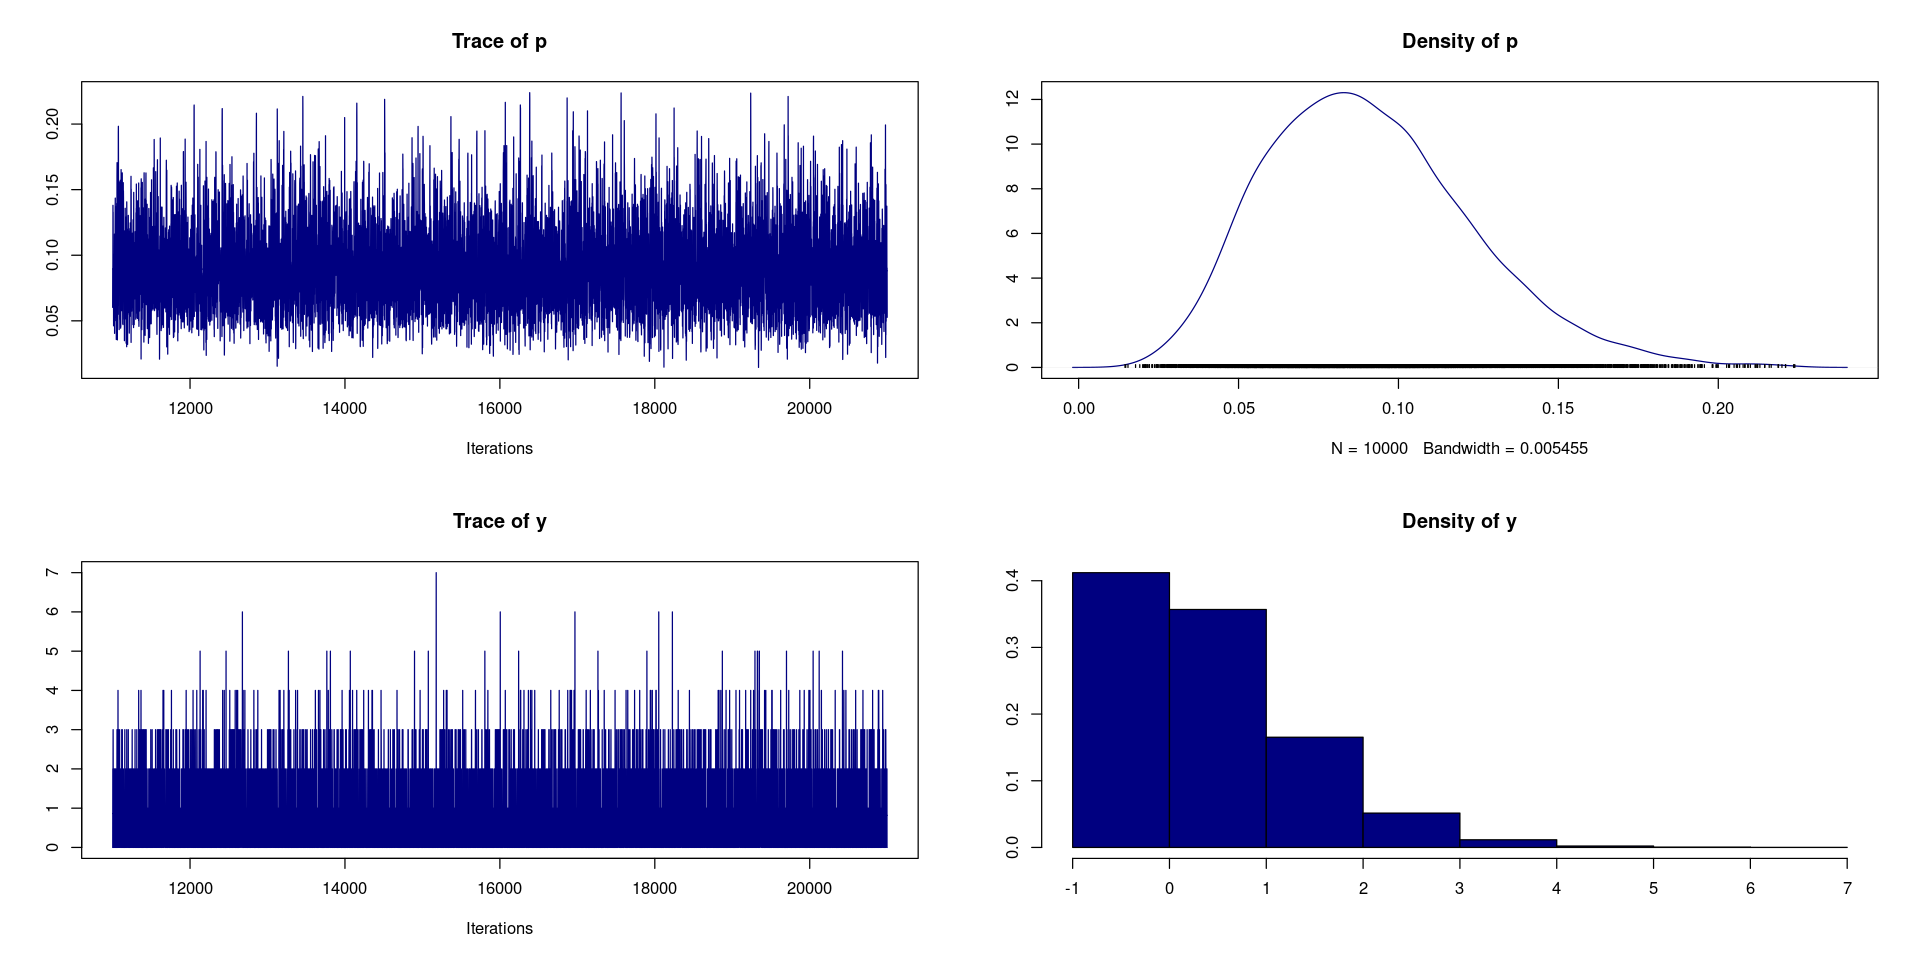

In [17]:
options(repr.plot.width=16,repr.plot.height=8)
data <- NULL
data$x <- 6  # Set of observations
data$n <- 75 # those to be considered
data$n_next <- 10 # Predictions

cat("model{
    ## liklihood : sum of the Bernoulli process is binomial distribution
    x ~ dbin(p,n)

    # Prior: uniform
    p ~ dbeta(1, 1)

    ## postorior:  binomial
    y ~ dbin(p,n_next)
    
}", file="4-6.bug")

model<- "4-6.bug"

jm <- jags.model(model ,data)
update(jm, 10000); # Burning 10000 samples to the MCMC gods...
chain <- coda.samples(jm , c("p","y"), n.iter=10000)
plot(chain , col="navy")
summary(chain)

## Exercise 5
#### • analyze the data of Exercise 2 using a MCMC with JAGS

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 12
   Unobserved stochastic nodes: 4
   Total graph size: 17

Initializing model




Iterations = 10001:20000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean    SD Naive SE Time-series SE
lambda1 33.49 2.413  0.02413        0.02413
lambda2 46.88 2.798  0.02798        0.02798
y1      33.51 6.256  0.06256        0.06256
y2      46.91 7.330  0.07330        0.07202

2. Quantiles for each variable:

         2.5%   25%   50%   75% 97.5%
lambda1 28.95 31.81 33.43 35.08 38.41
lambda2 41.60 44.97 46.82 48.75 52.45
y1      22.00 29.00 33.00 38.00 46.00
y2      33.00 42.00 47.00 52.00 62.00


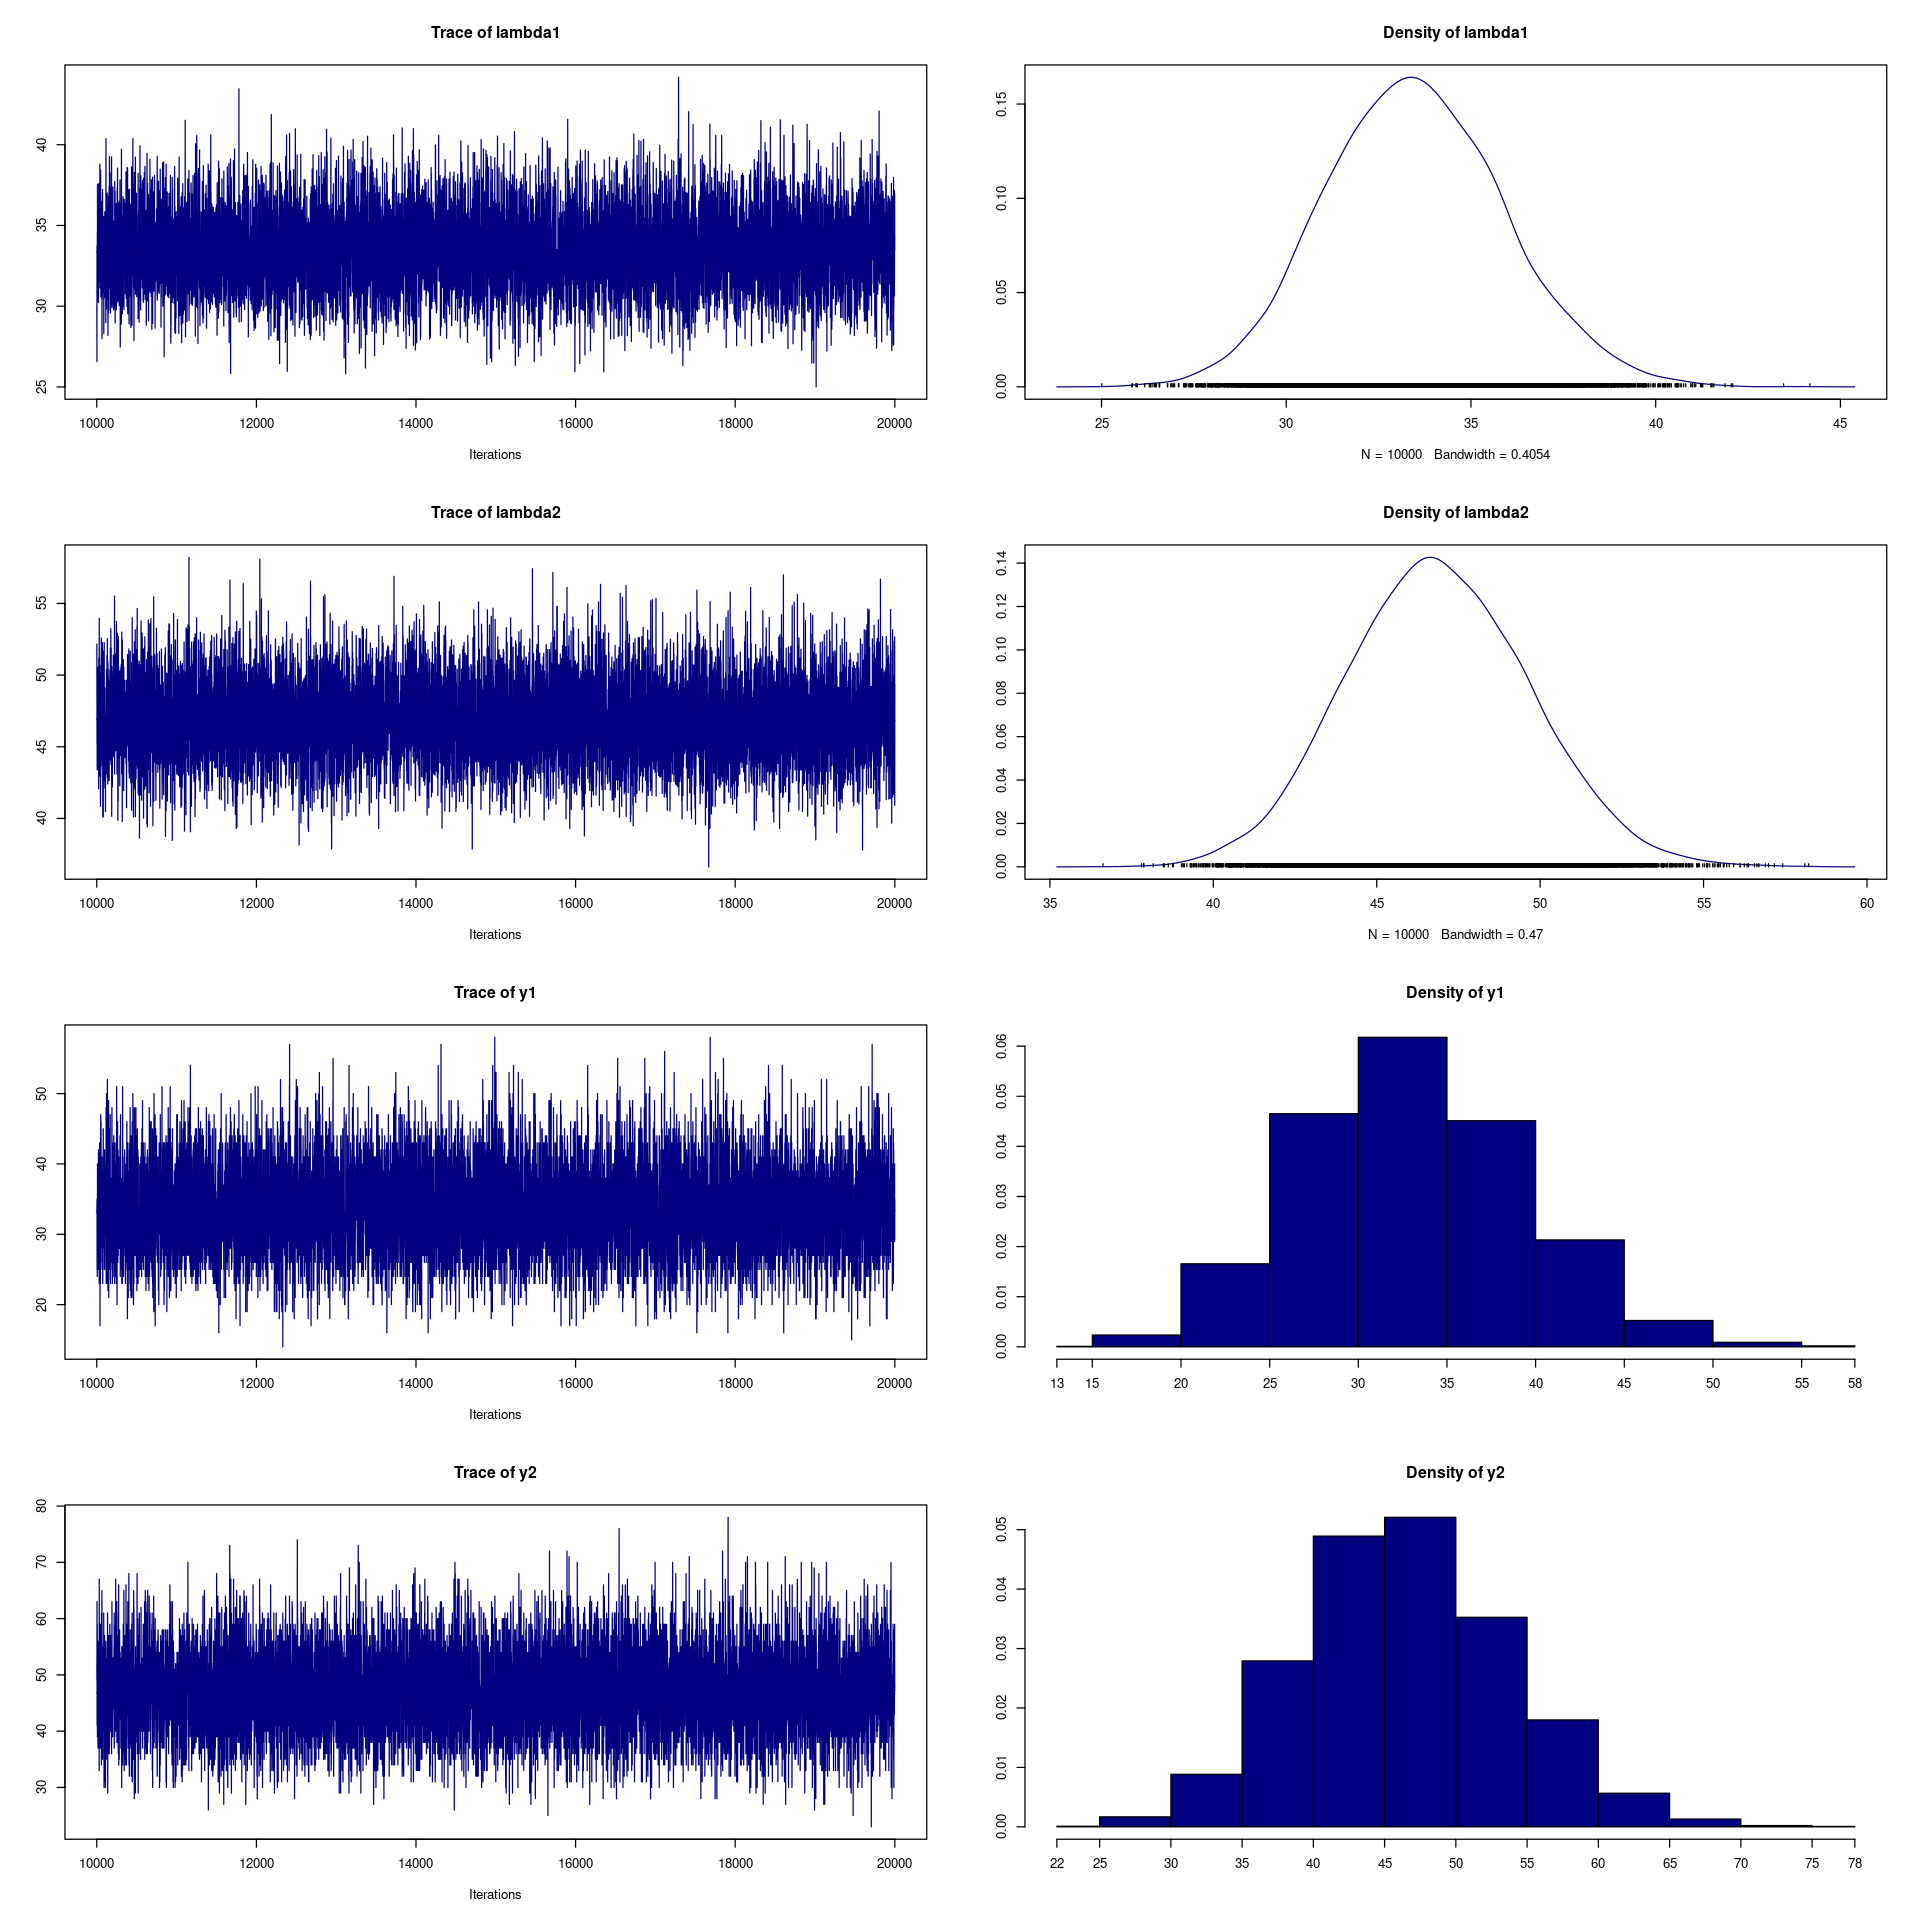

In [18]:
### a

options(repr.plot.width=16,repr.plot.height=16)
cat("model{
  for(i in 1:length(x1) ) {
    x1[i] ~ dpois(lambda1)
  }
  for(i in 1:length(x2) ) {
    x2[i] ~ dpois(lambda2)
  }
  
  # a uniform prior for lambda1
  lambda1 ~ dexp(0.00001)
  # a uniform prior for lambda2
  lambda2 ~ dexp(0.00001)

  # Predicted data , given lambda1
  y1 ~ dpois(lambda1)
  # Predicted data , given lambda2
  y2 ~ dpois(lambda2)

}", file="5-6-u.bug")

model<- "5-6-u.bug"

data <- NULL
data$x1 <- c(109,65,22,3,1,0)  # Set of observations
data$x2 <- c(144,91,32,11,2,0) # Set of observations  
    
jm <- jags.model(model ,data)
update(jm, 10000); # Burning 10000 samples to the MCMC gods...
chain_u <- coda.samples(jm , c("lambda1","lambda2","y1","y2"), n.iter=10000)
plot(chain_u , col="navy")
summary(chain_u)    

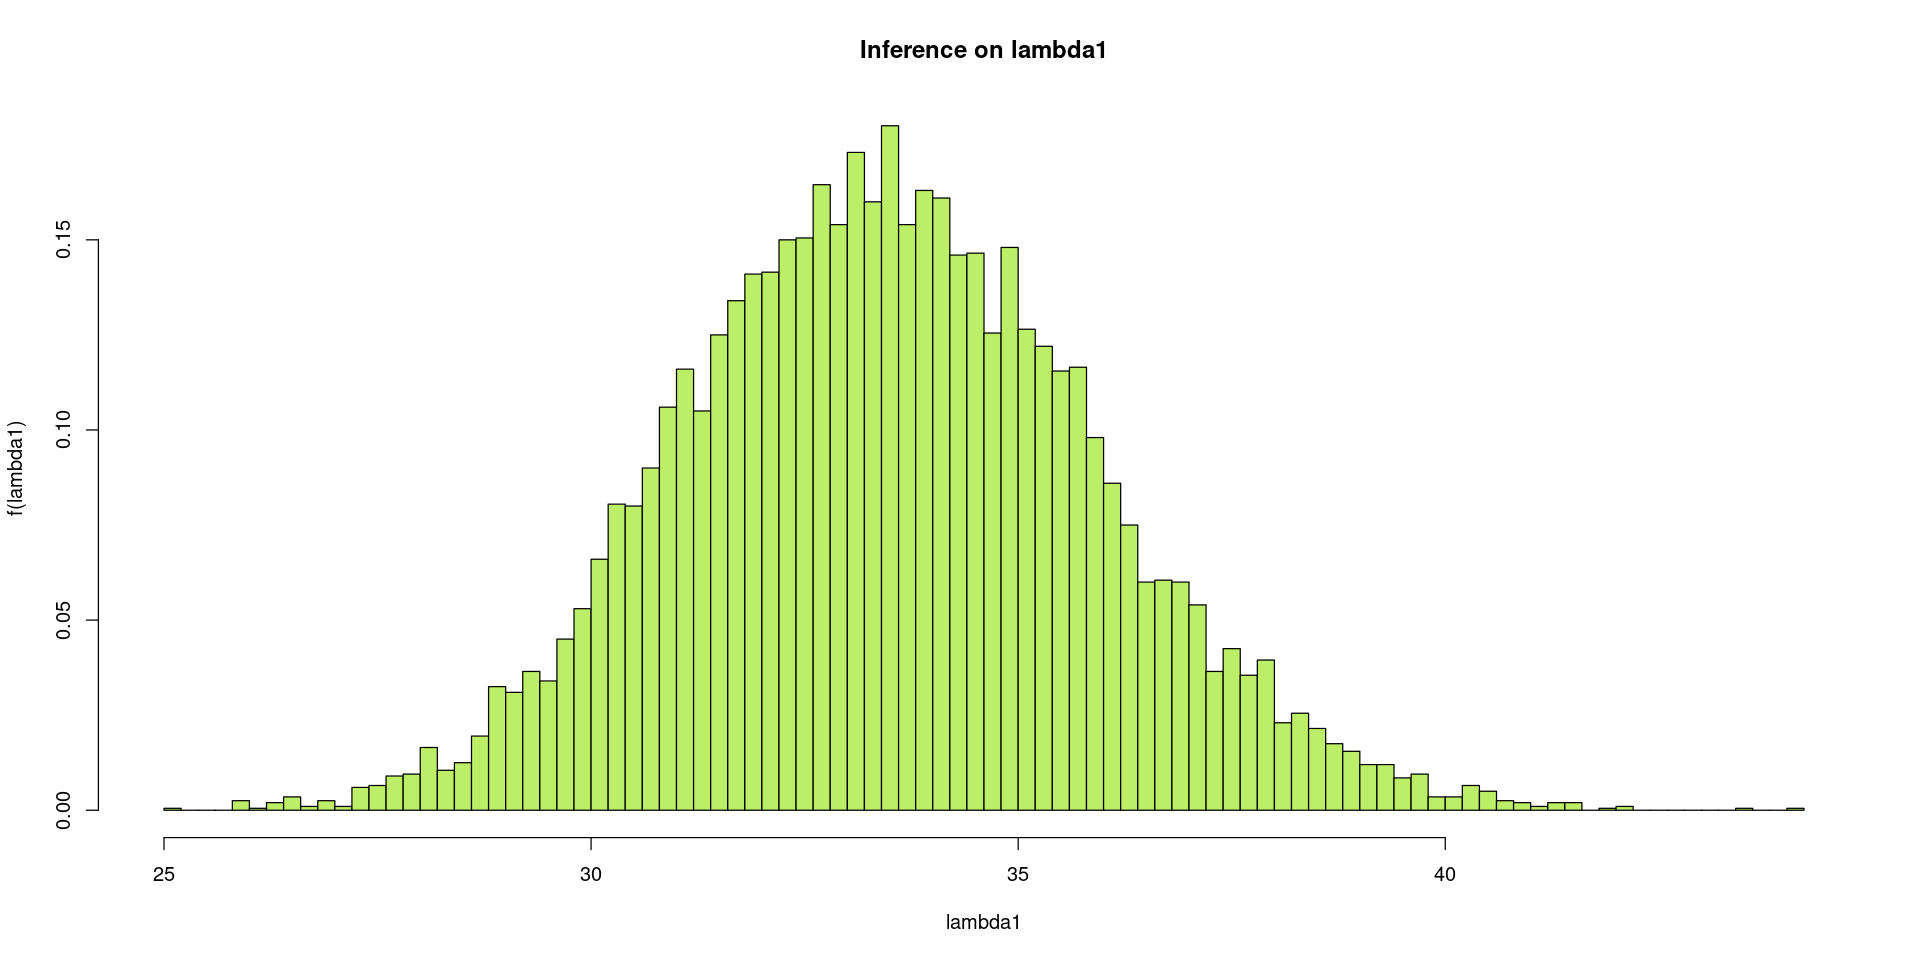

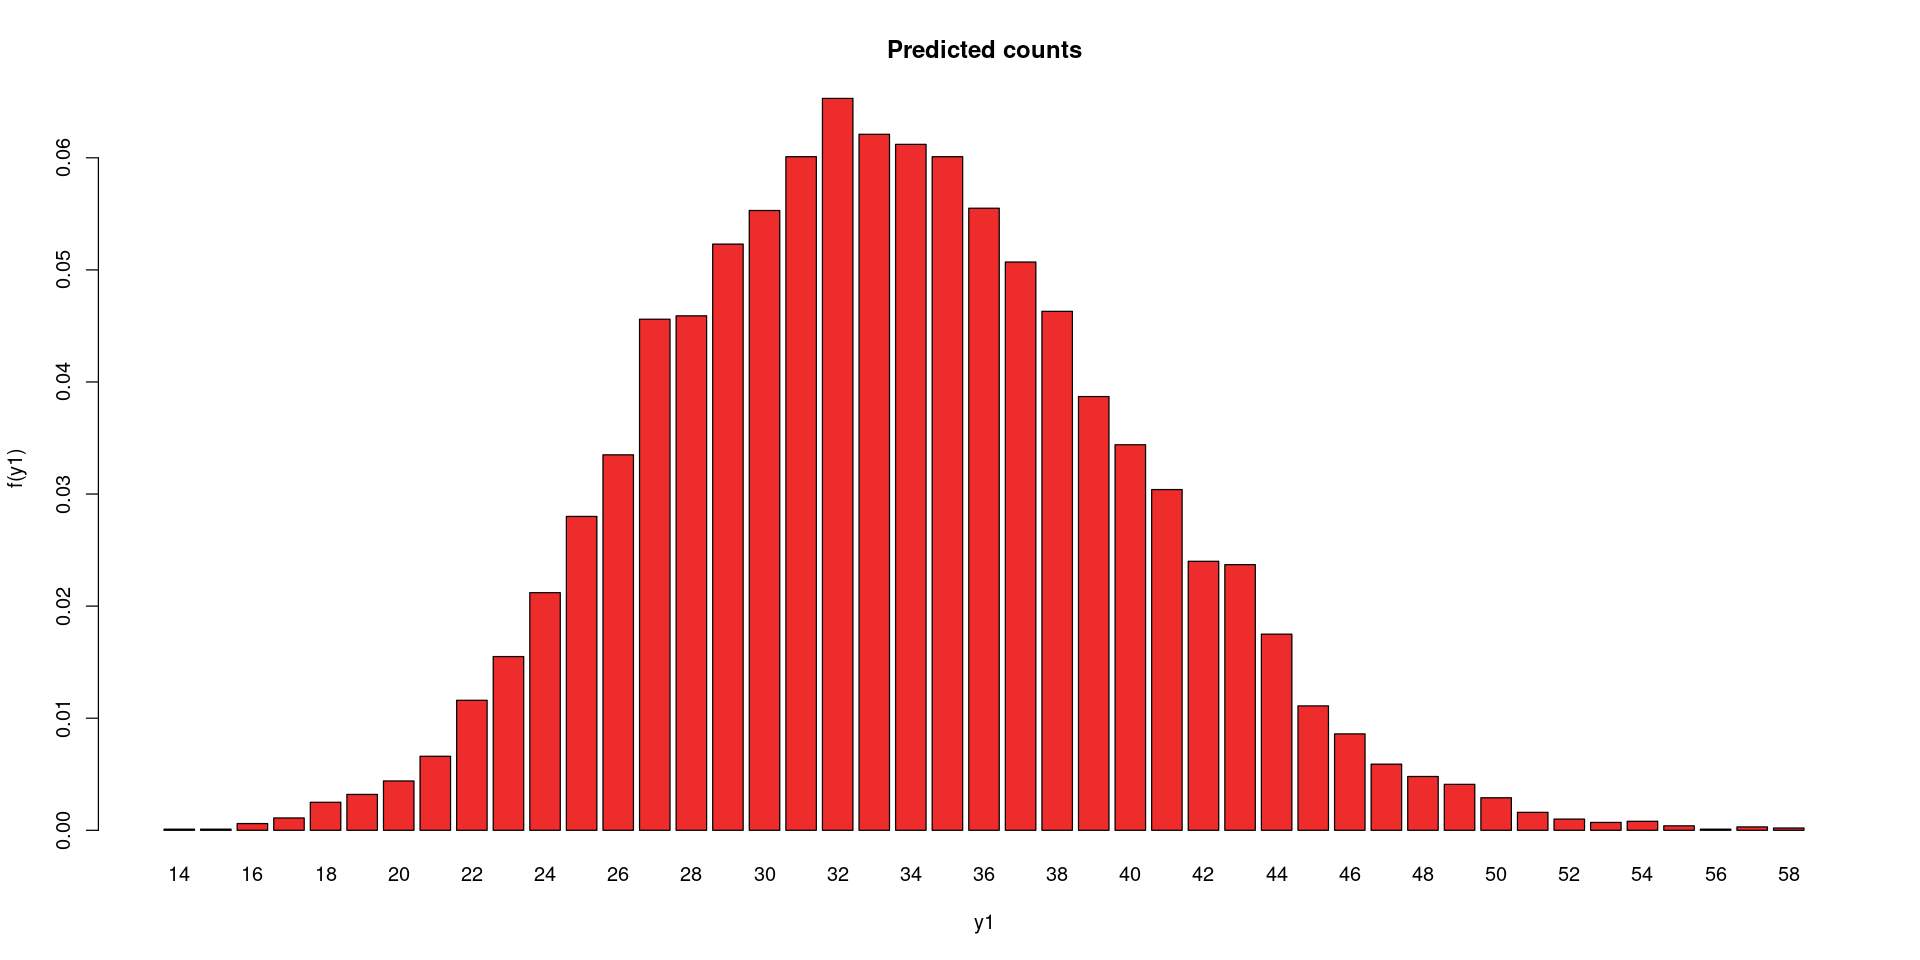

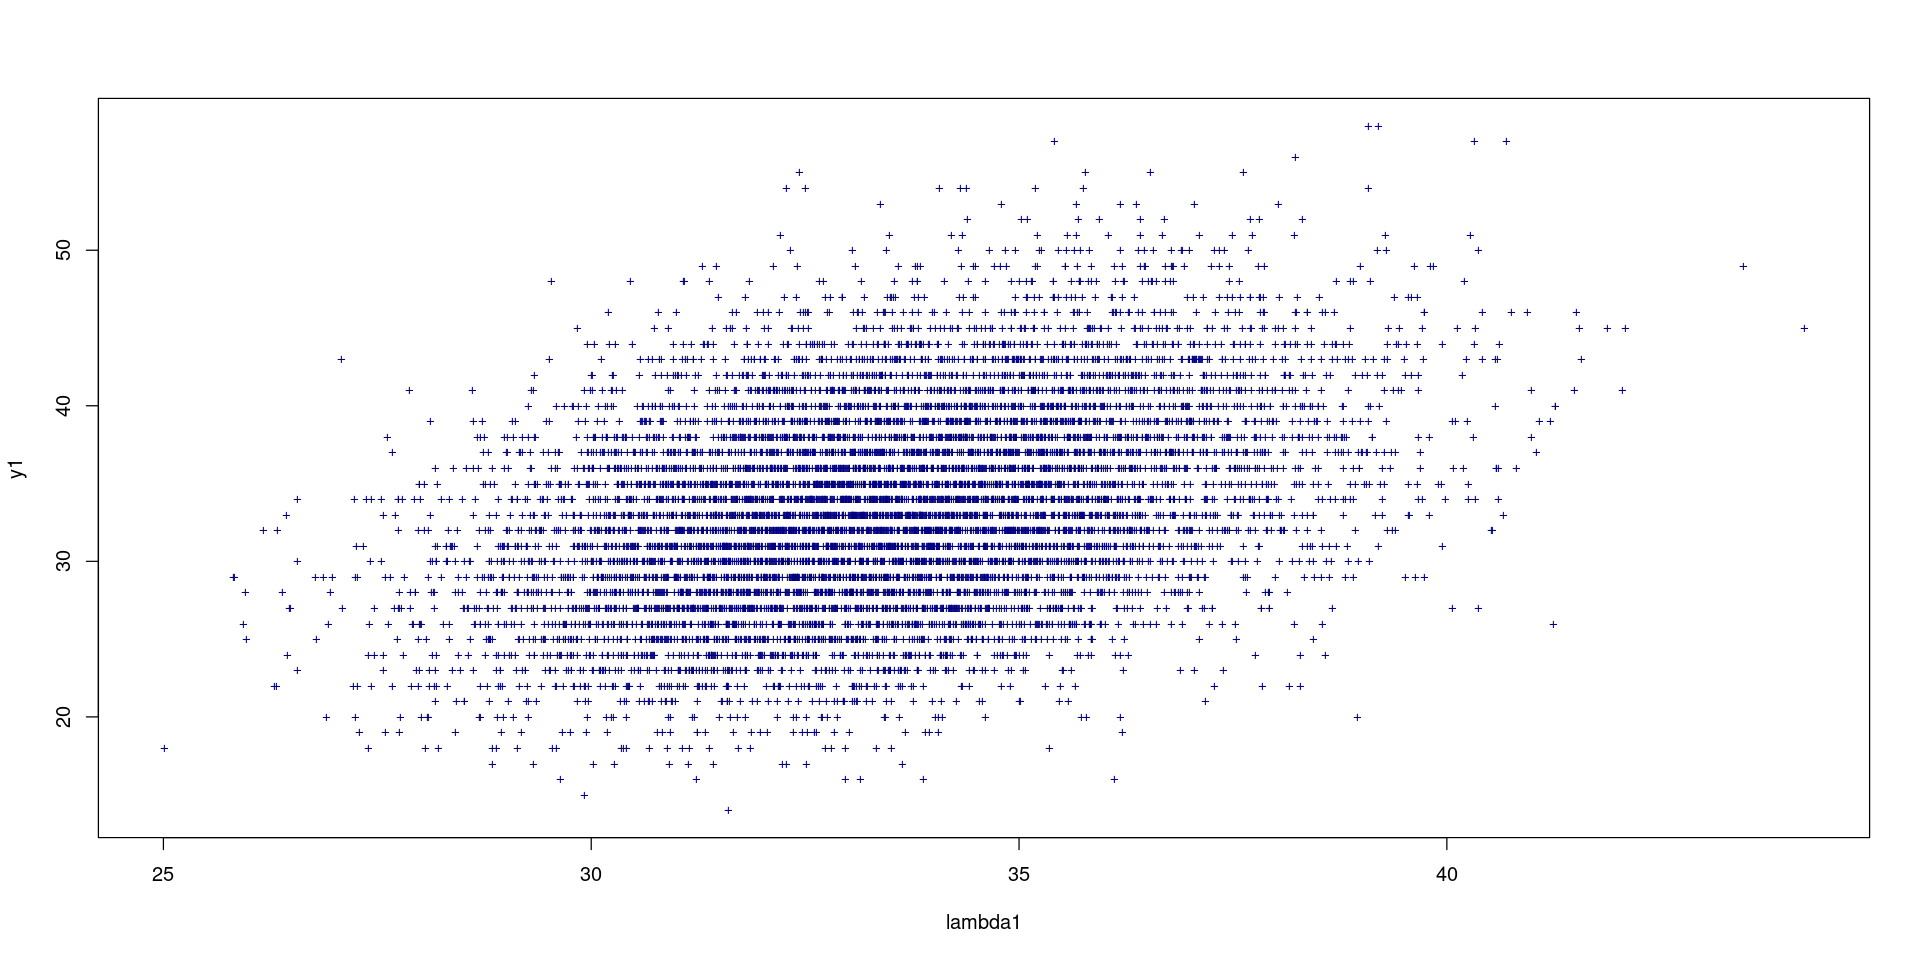

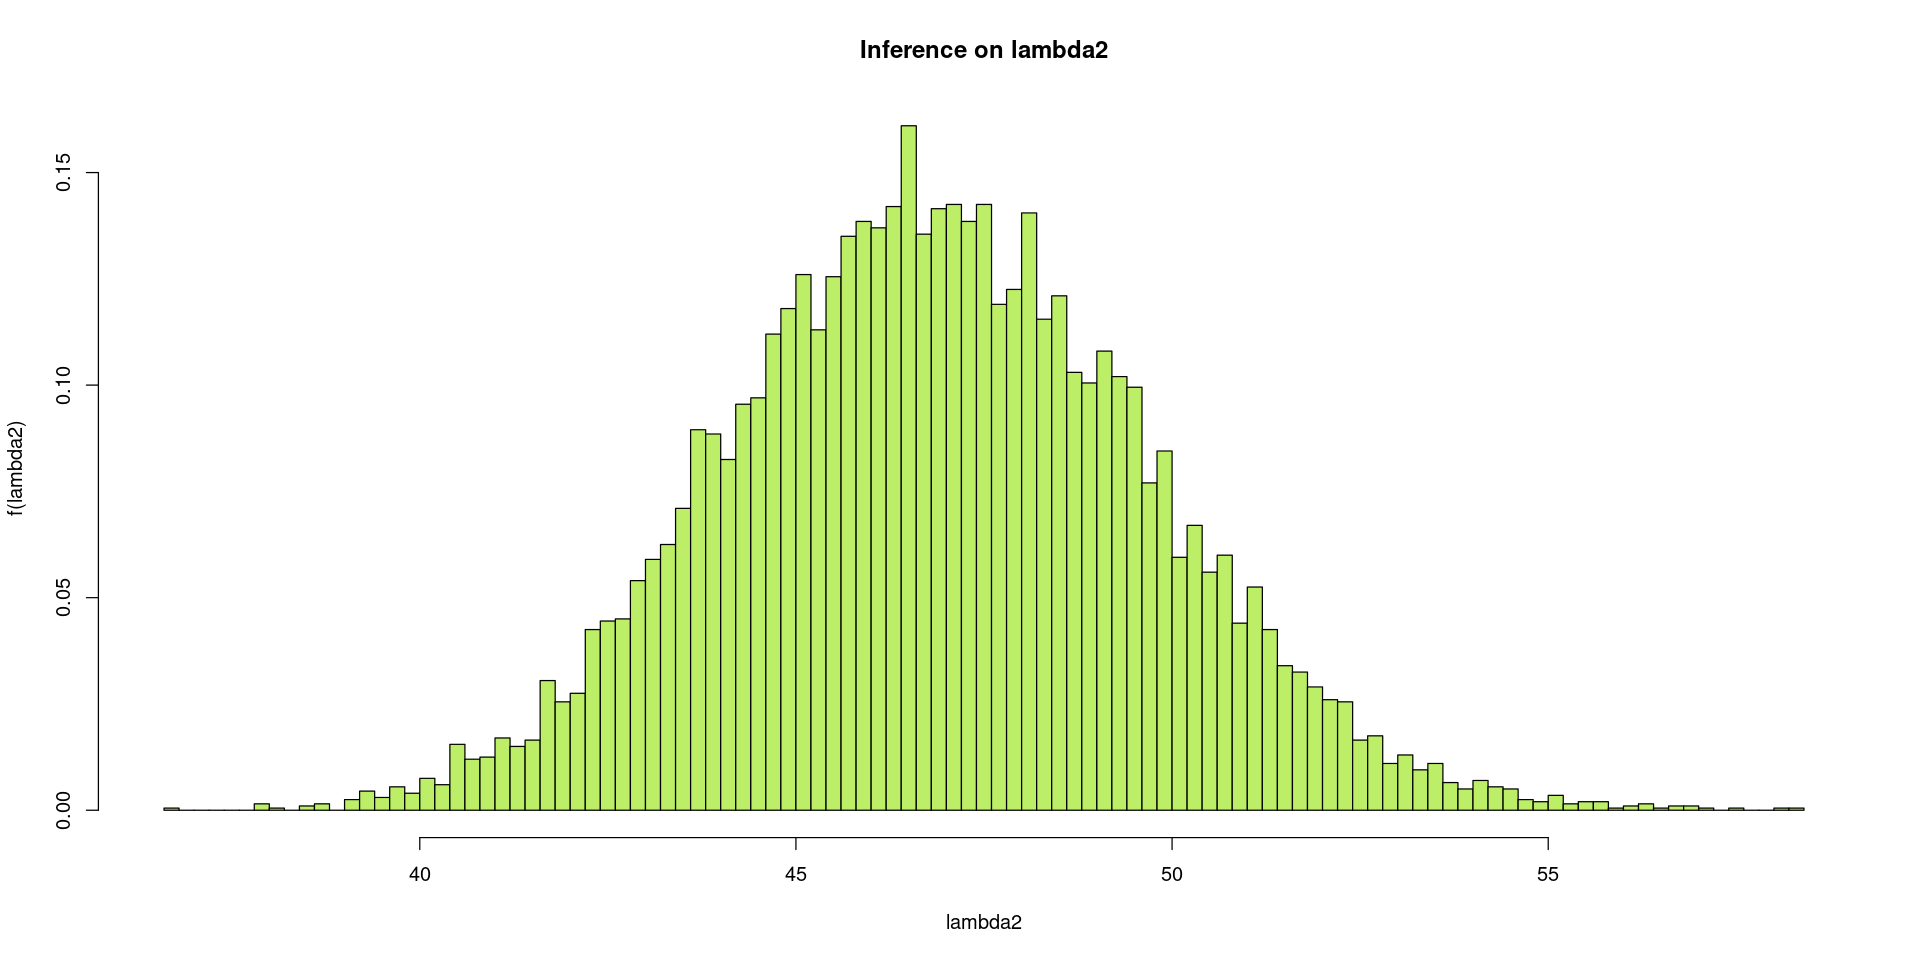

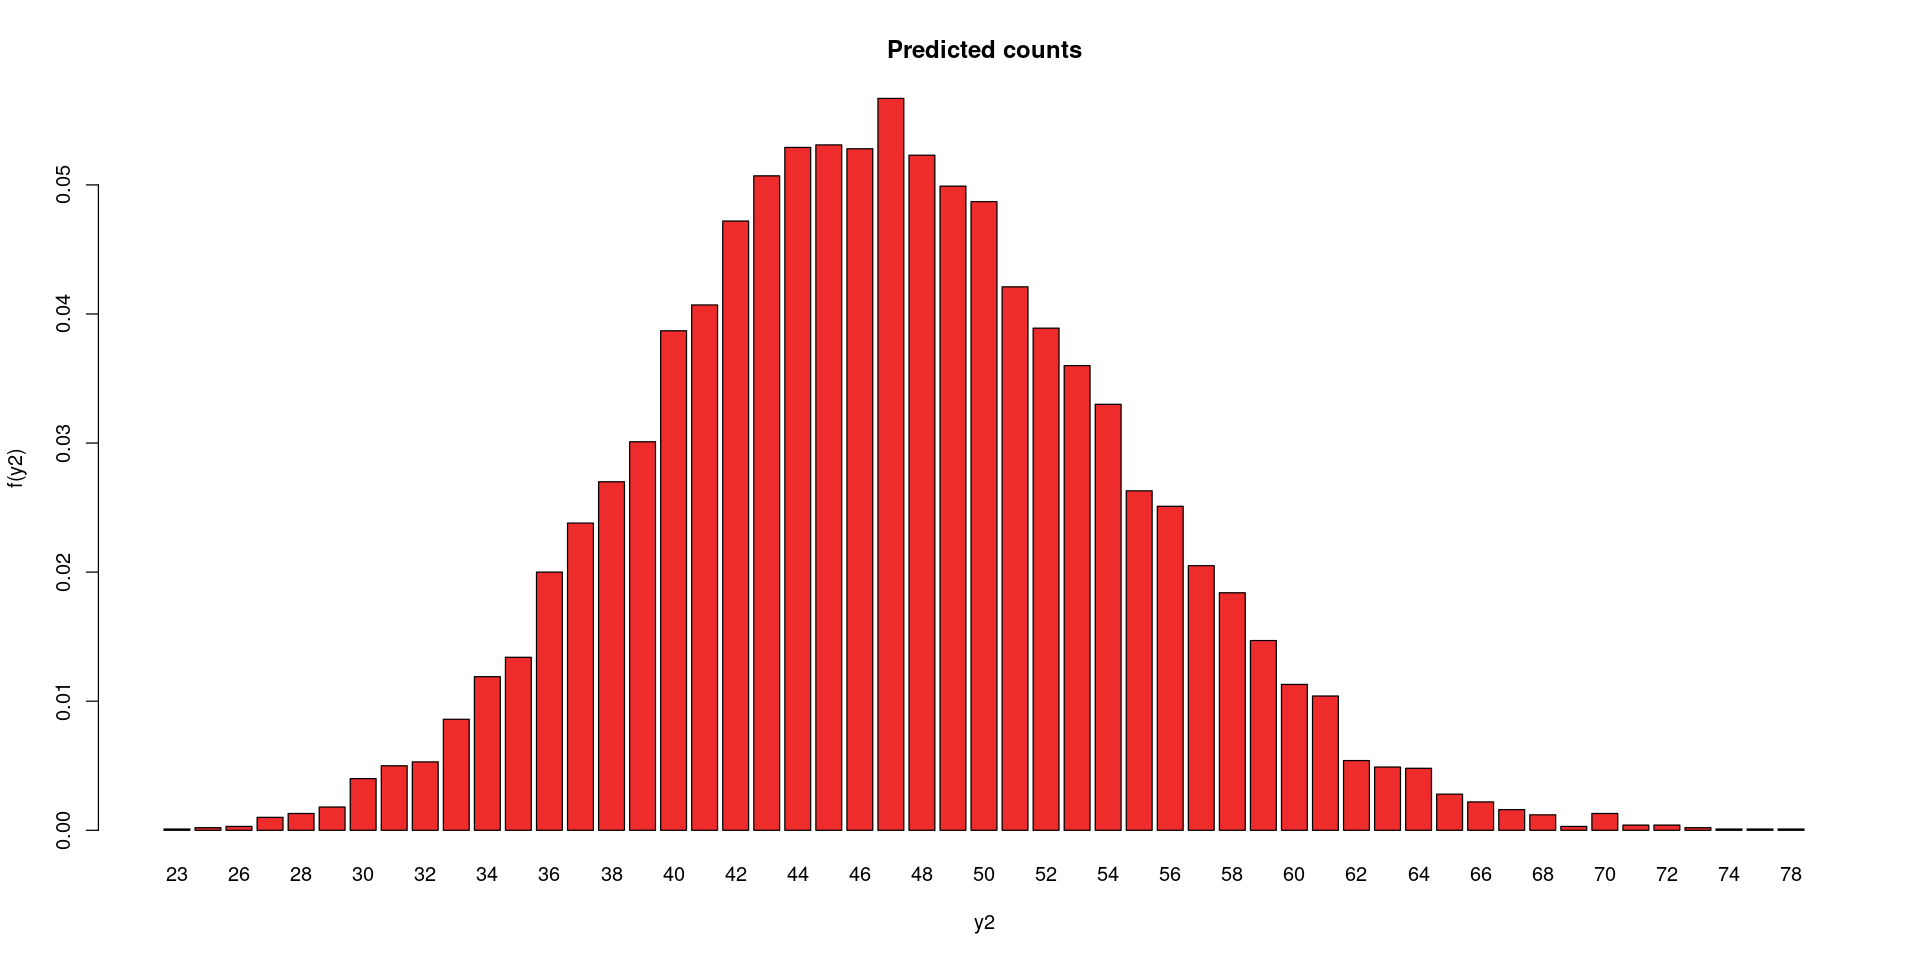

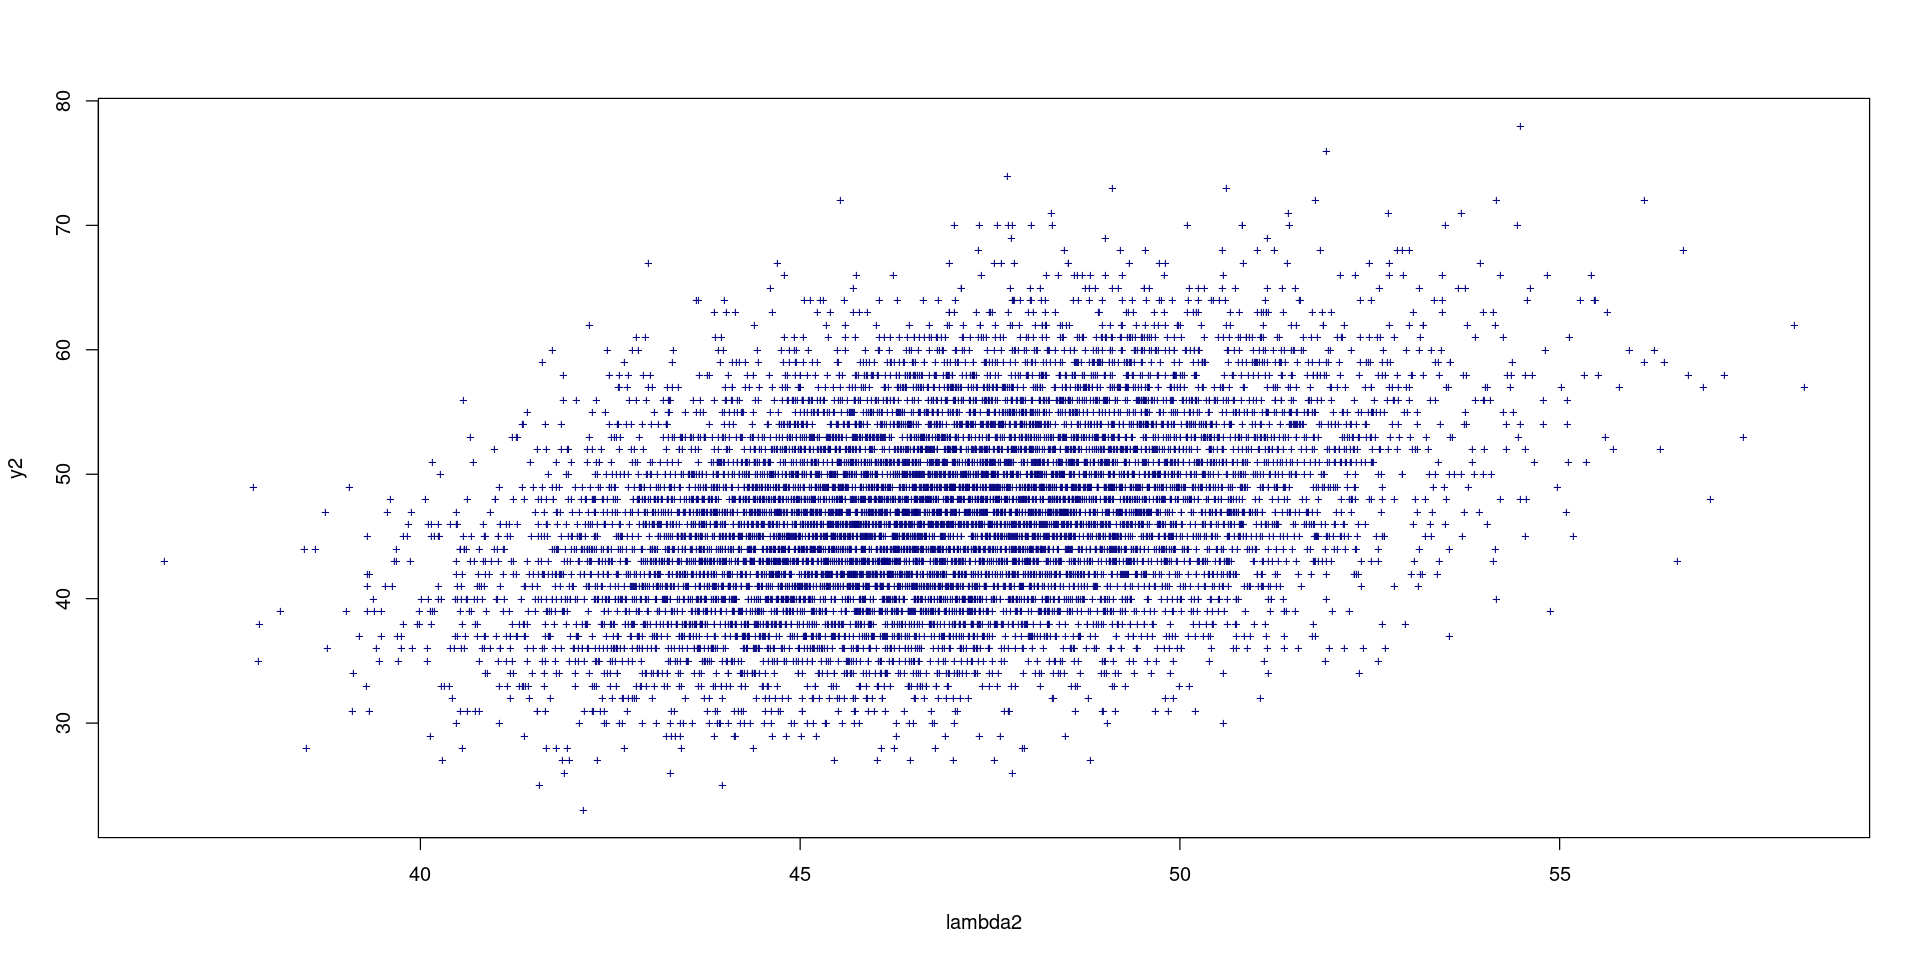

In [19]:
options(repr.plot.width=16,repr.plot.height=8)

# format our chain
chain.df <- as.data.frame( as.mcmc(chain_u) )

##(lambda1 ,y1)
# Probability plots
hist(chain.df$lambda1 , nc=100, prob=TRUE , col='darkolivegreen2',
xlab='lambda1', ylab='f(lambda1)', main='Inference on lambda1')
ty1 <- table(chain.df$y1)
barplot(ty1/sum(ty1), col='firebrick2', xlab='y1', ylab='f(y1)',
main=sprintf('Predicted counts'))

# And present/ future prediction correlations
plot(chain.df$lambda1 , chain.df$y1, xlab='lambda1', ylab='y1', main="",
pch='+', col='navy', cex=0.75)

##(lambda2 ,y2)
# Probability plots
hist(chain.df$lambda2 , nc=100, prob=TRUE , col='darkolivegreen2',
xlab='lambda2', ylab='f(lambda2)', main='Inference on lambda2')
ty2 <- table(chain.df$y2)
barplot(ty2/sum(ty2), col='firebrick2', xlab='y2', ylab='f(y2)',
main=sprintf('Predicted counts'))

# And present/ future prediction correlations
plot(chain.df$lambda2 , chain.df$y2, xlab='lambda2', ylab='y2', main="",
pch='+', col='navy', cex=0.75)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 12
   Unobserved stochastic nodes: 4
   Total graph size: 17

Initializing model




Iterations = 10001:20000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean    SD Naive SE Time-series SE
lambda1 33.37 2.356  0.02356        0.02356
lambda2 46.66 2.779  0.02779        0.02779
y1      33.32 6.266  0.06266        0.06174
y2      46.78 7.387  0.07387        0.07387

2. Quantiles for each variable:

         2.5%   25%   50%   75% 97.5%
lambda1 28.87 31.75 33.33 34.94 38.07
lambda2 41.40 44.80 46.58 48.46 52.34
y1      22.00 29.00 33.00 37.00 46.00
y2      33.00 42.00 47.00 52.00 62.00


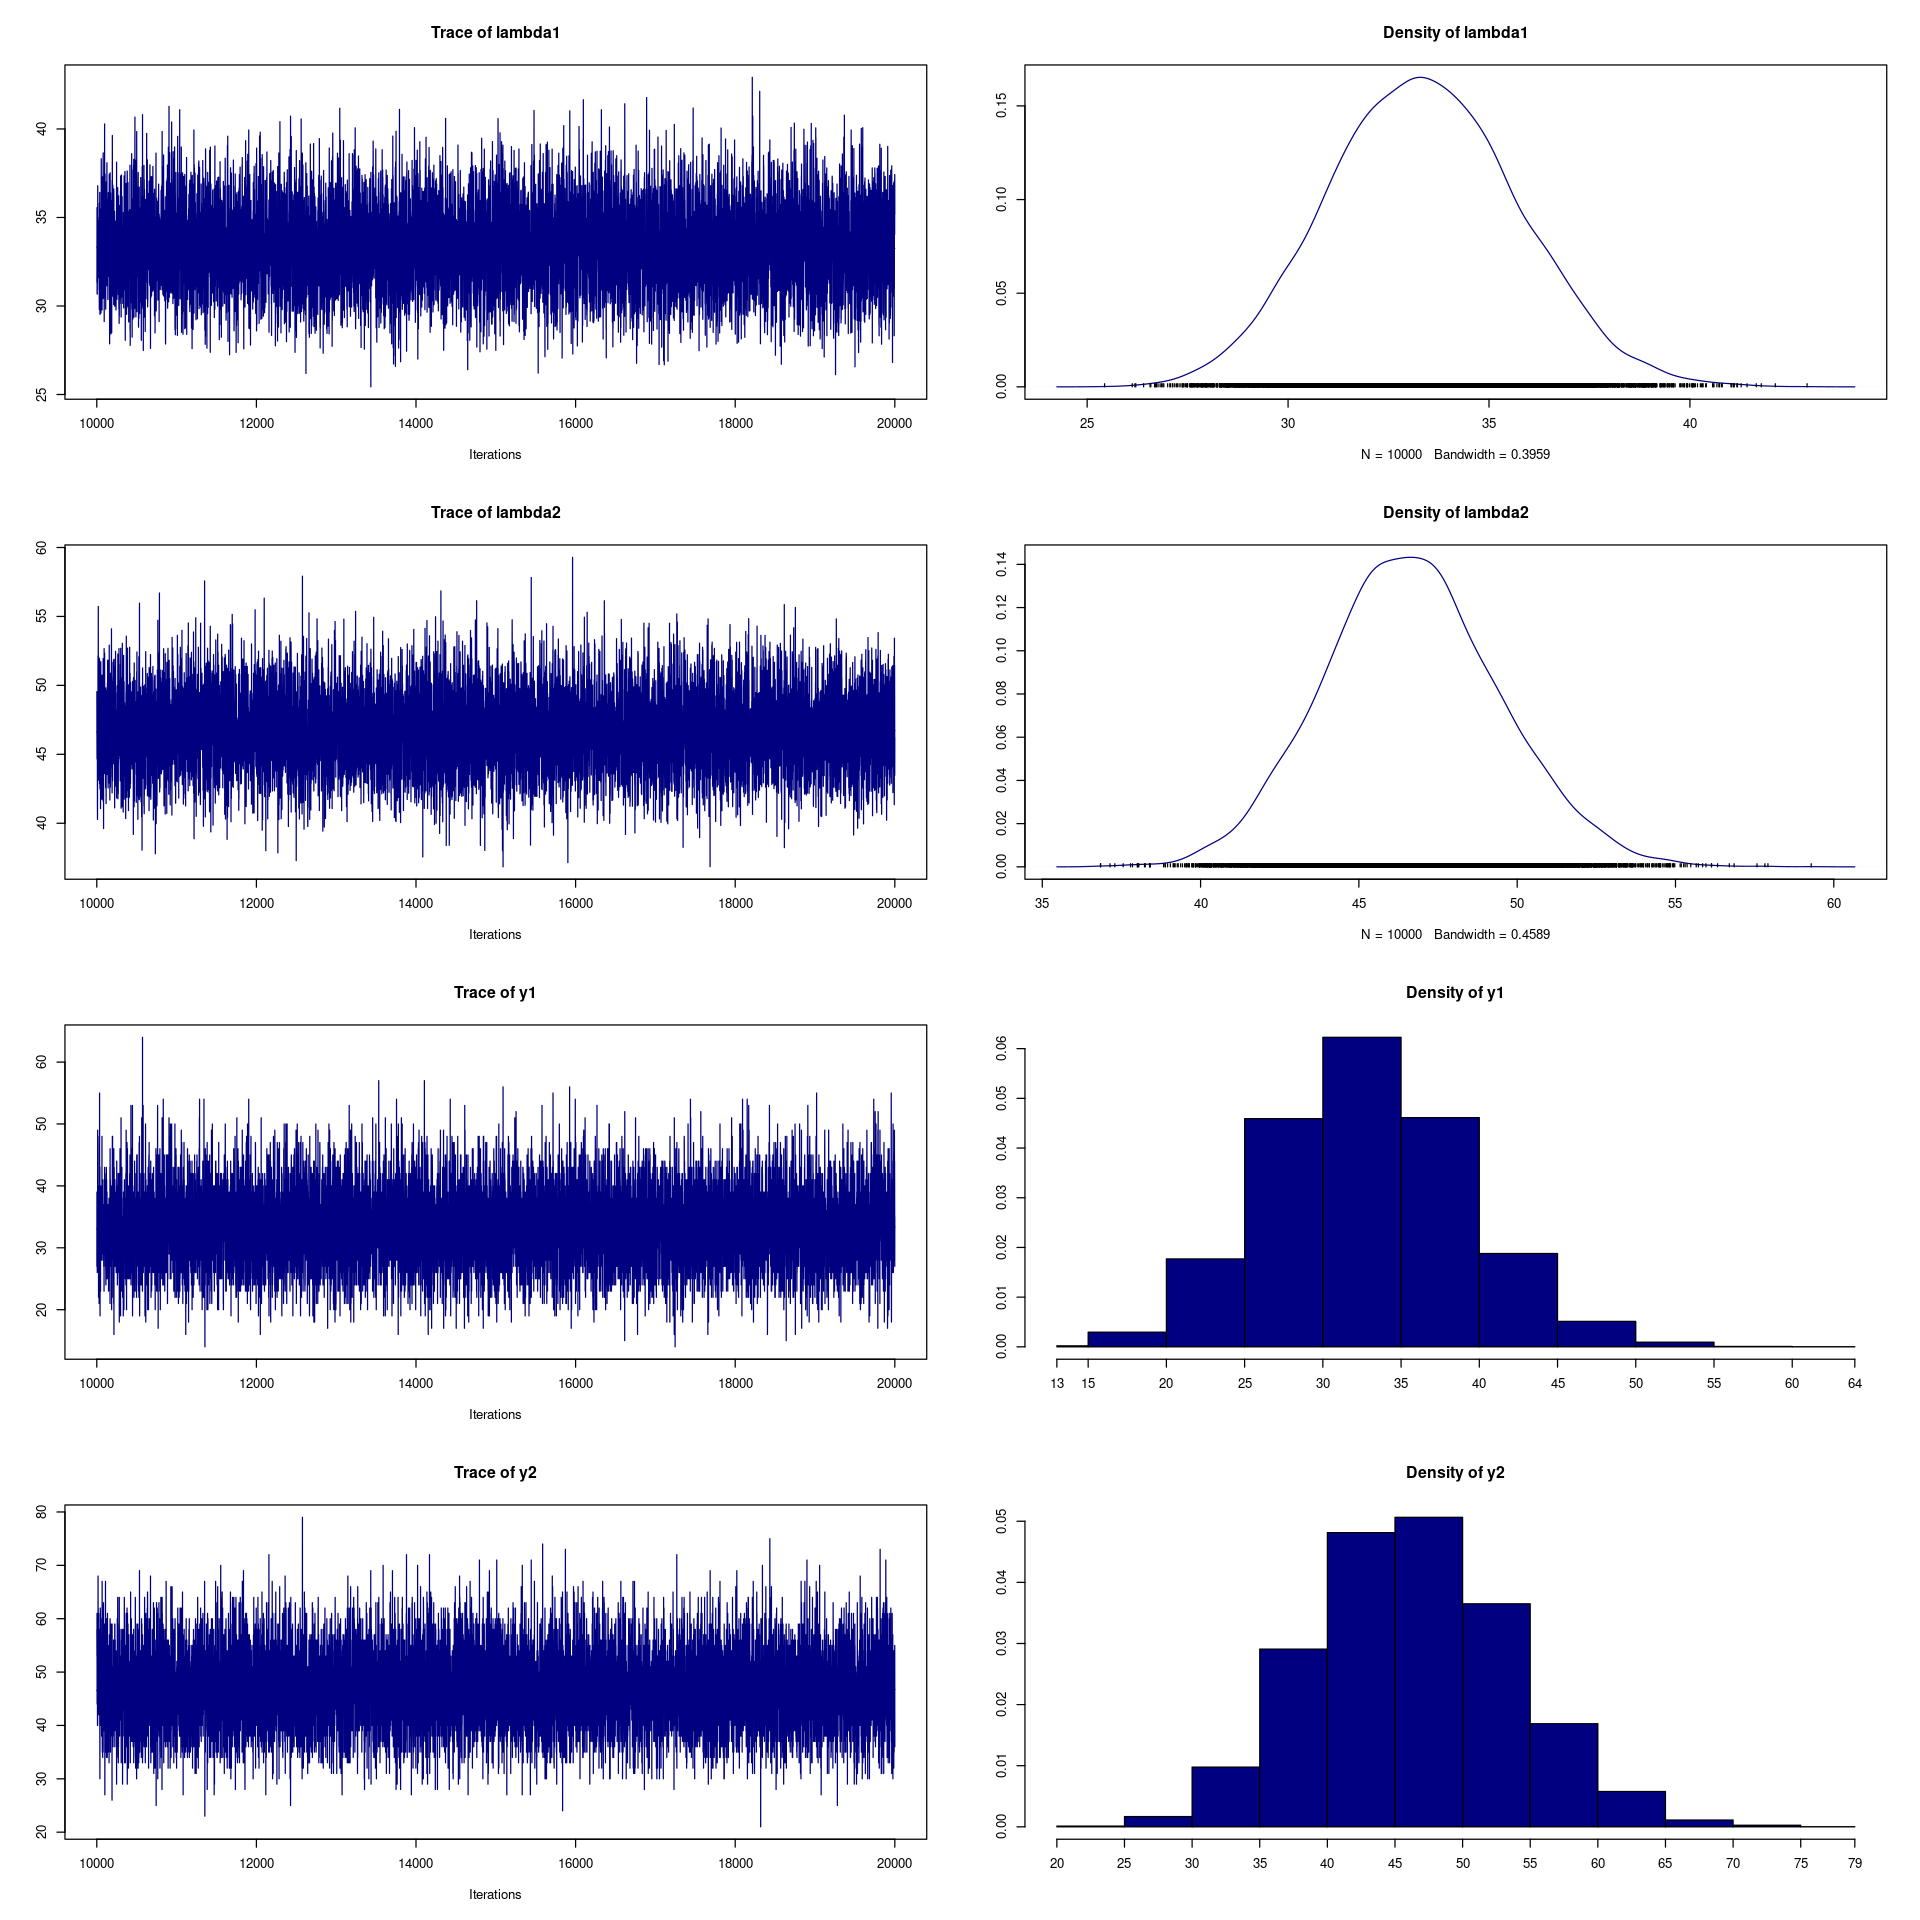

In [20]:
### b

options(repr.plot.width=16,repr.plot.height=16)
cat("model{
  #likelihood
  for(i in 1:length(x1) ) {
    x1[i] ~ dpois(lambda1)
  }
  for(i in 1:length(x2) ) {
    x2[i] ~ dpois(lambda2)
  }
  
  # a jefry prior (gama distribution with very small shape and rate) for lambda1
  lambda1 ~ dgamma(0.0001, 0.0001)
  # a jefry prior (gama distribution with very small shape and rate) for lambda2
  lambda2 ~ dgamma(0.0001, 0.0001)

  # Predicted data , given lambda1
  y1 ~ dpois(lambda1)
  # Predicted data , given lambda2
  y2 ~ dpois(lambda2)

}", file="5-6-j.bug")

model<- "5-6-j.bug"

data <- NULL
data$x1 <- c(109,65,22,3,1,0)  # Set of observations
data$x2 <- c(144,91,32,11,2,0) # Set of observations 

jm <- jags.model(model ,data)
update(jm, 10000); # Burning 10000 samples to the MCMC gods...
chain_j <- coda.samples(jm , c("lambda1", "lambda2","y1","y2"), n.iter=10000)
plot(chain_j , col="navy")
summary(chain_j)    

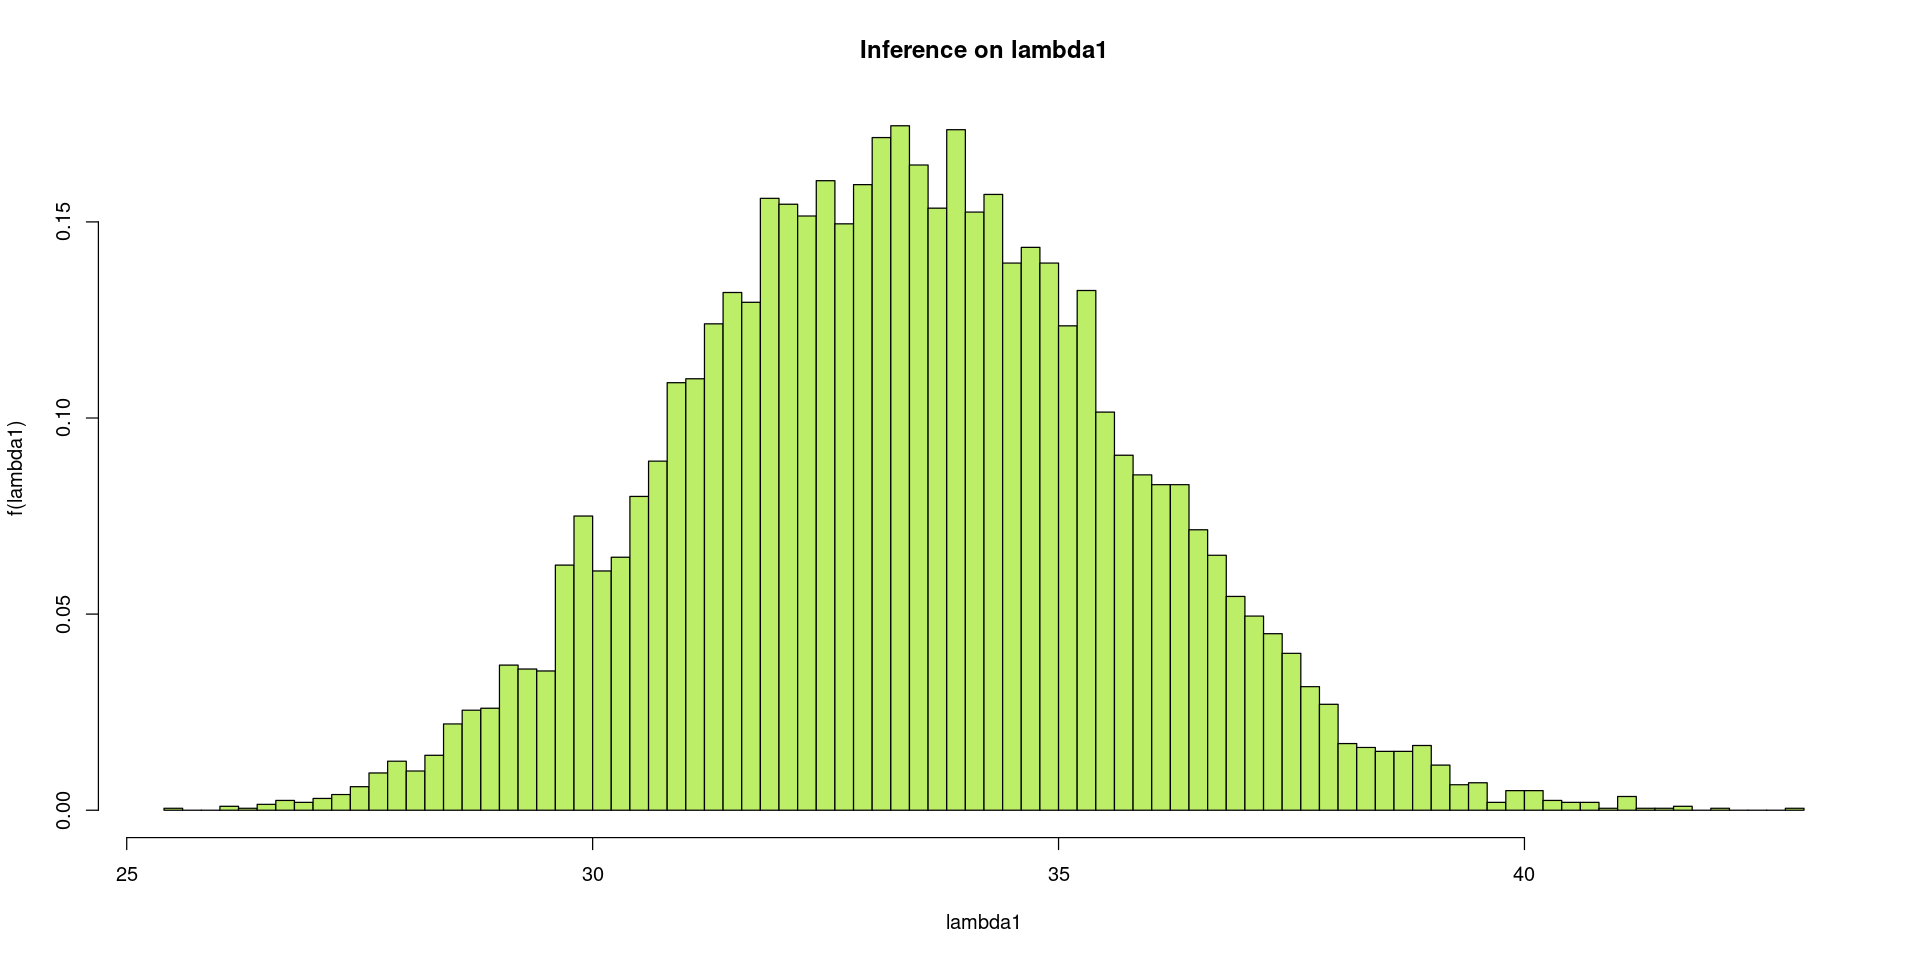

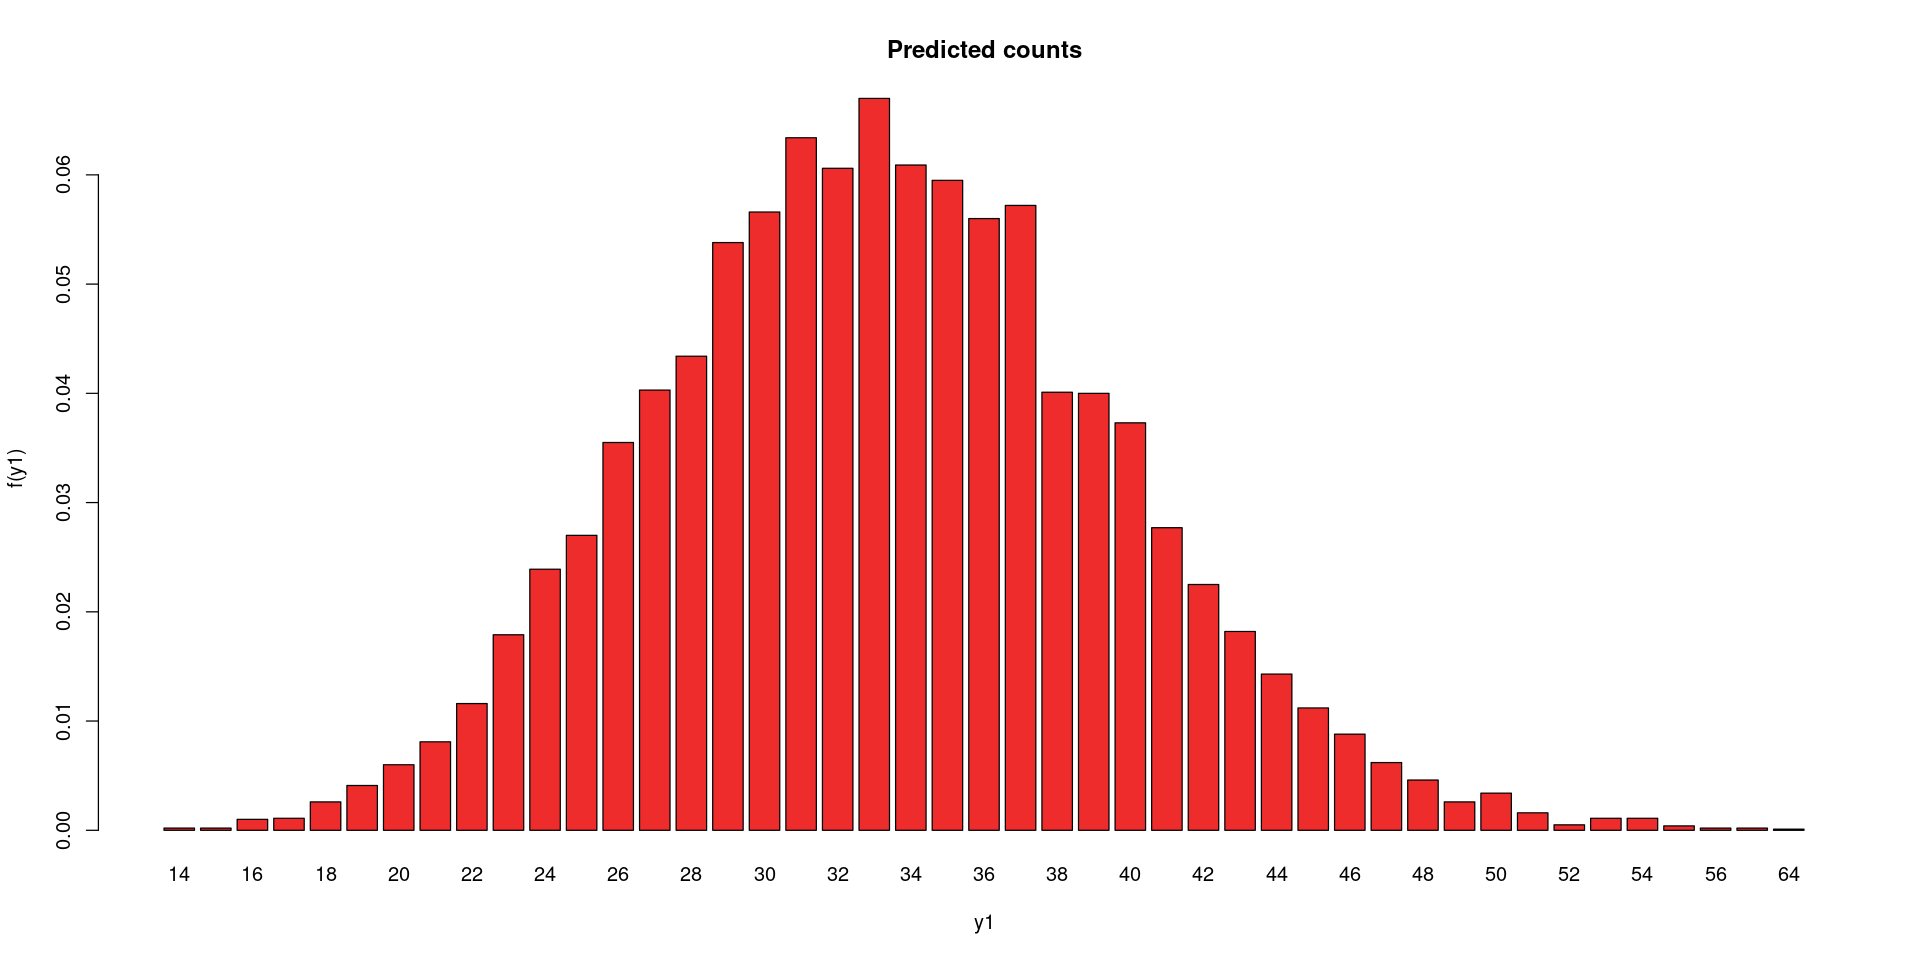

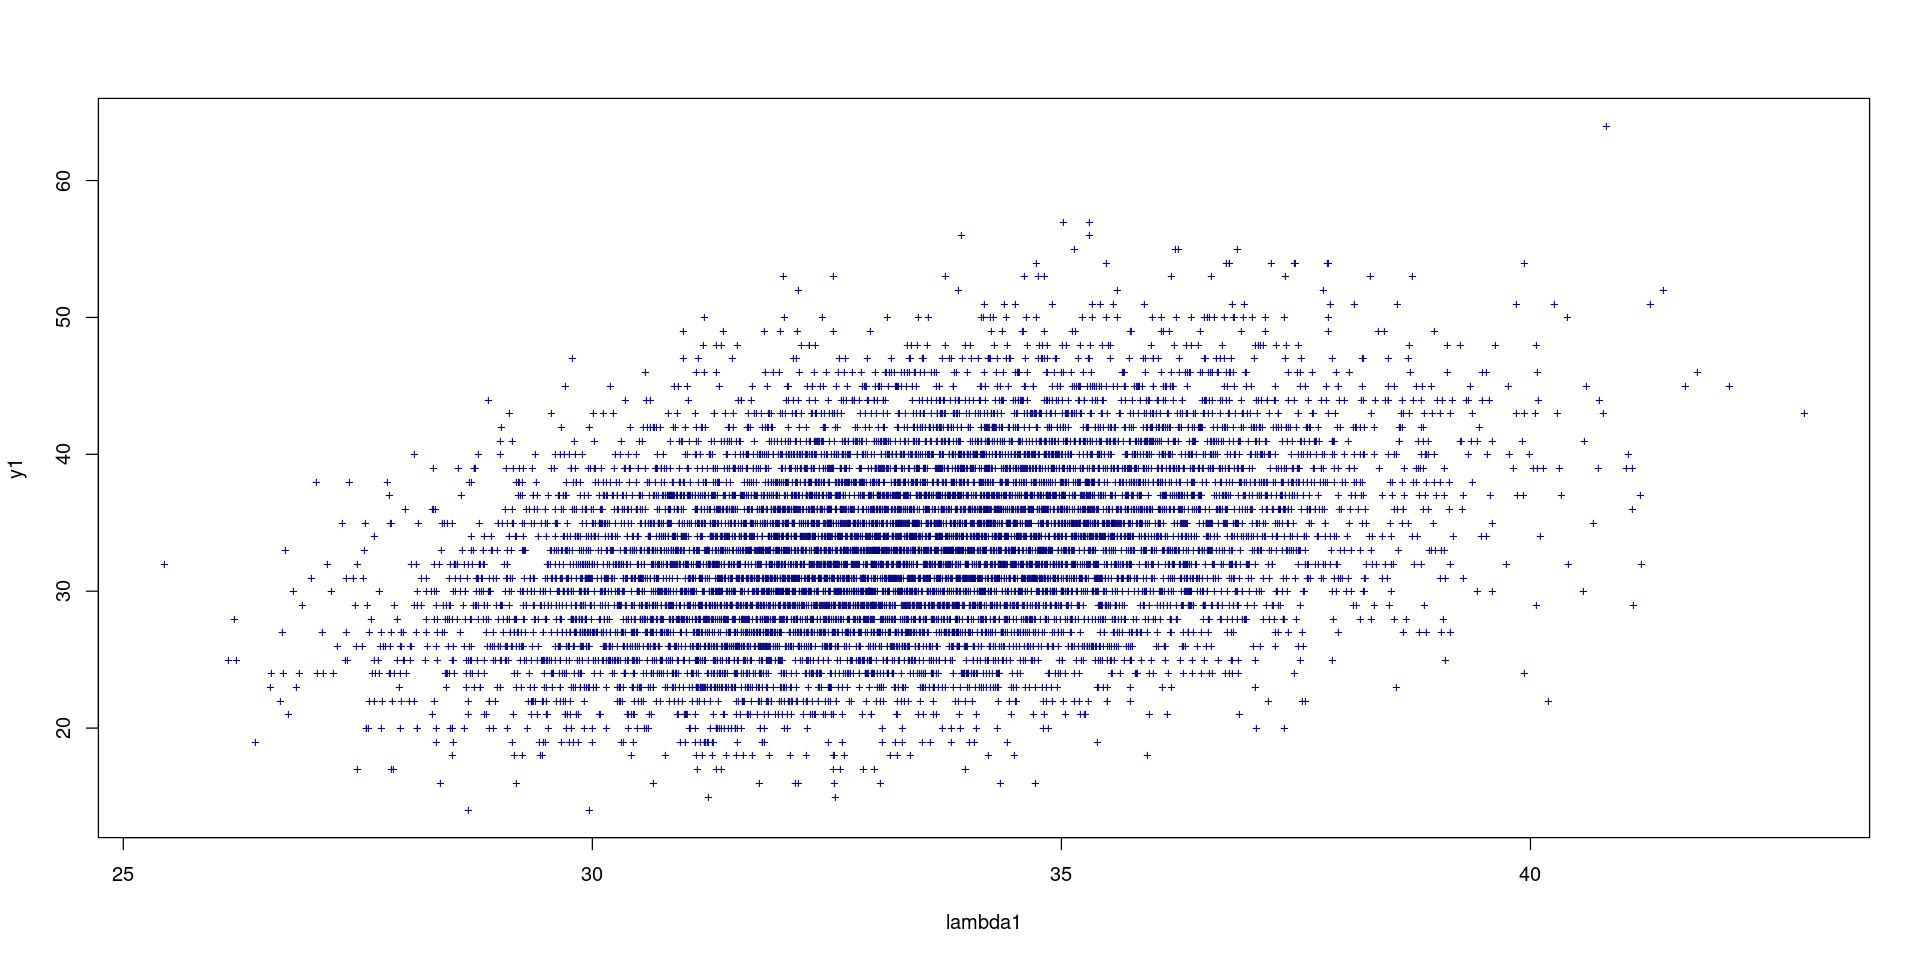

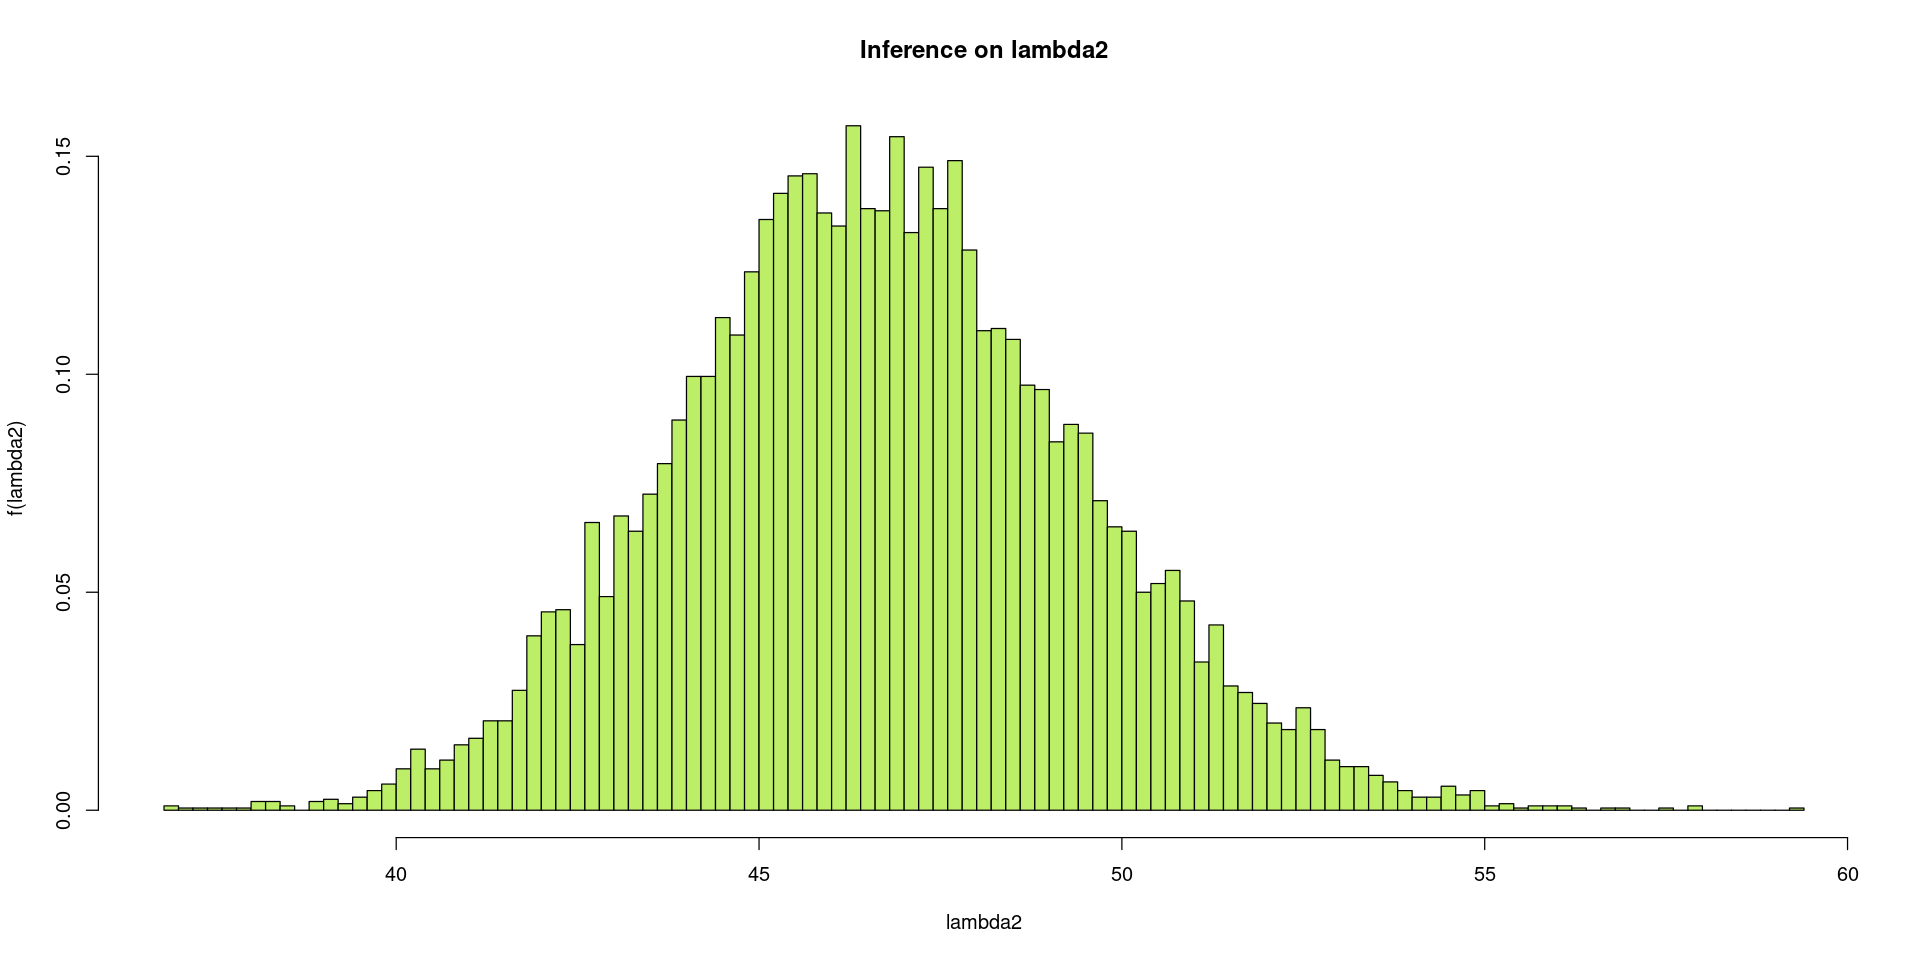

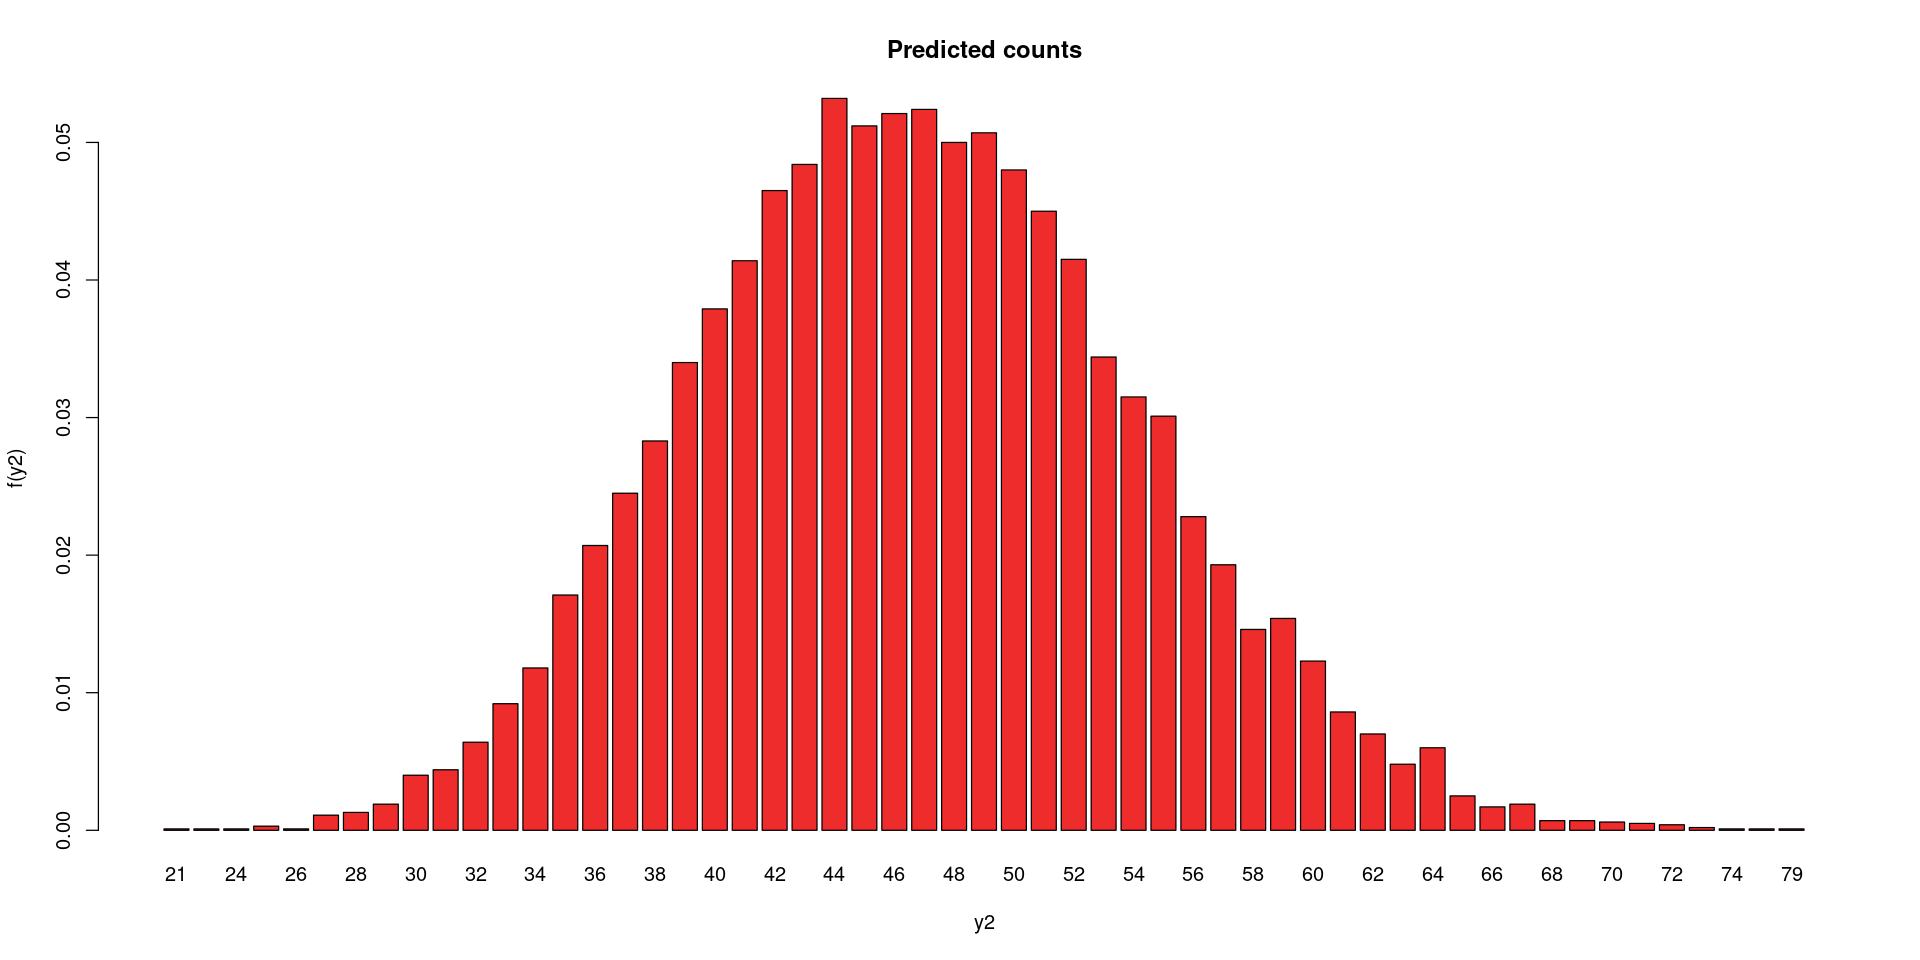

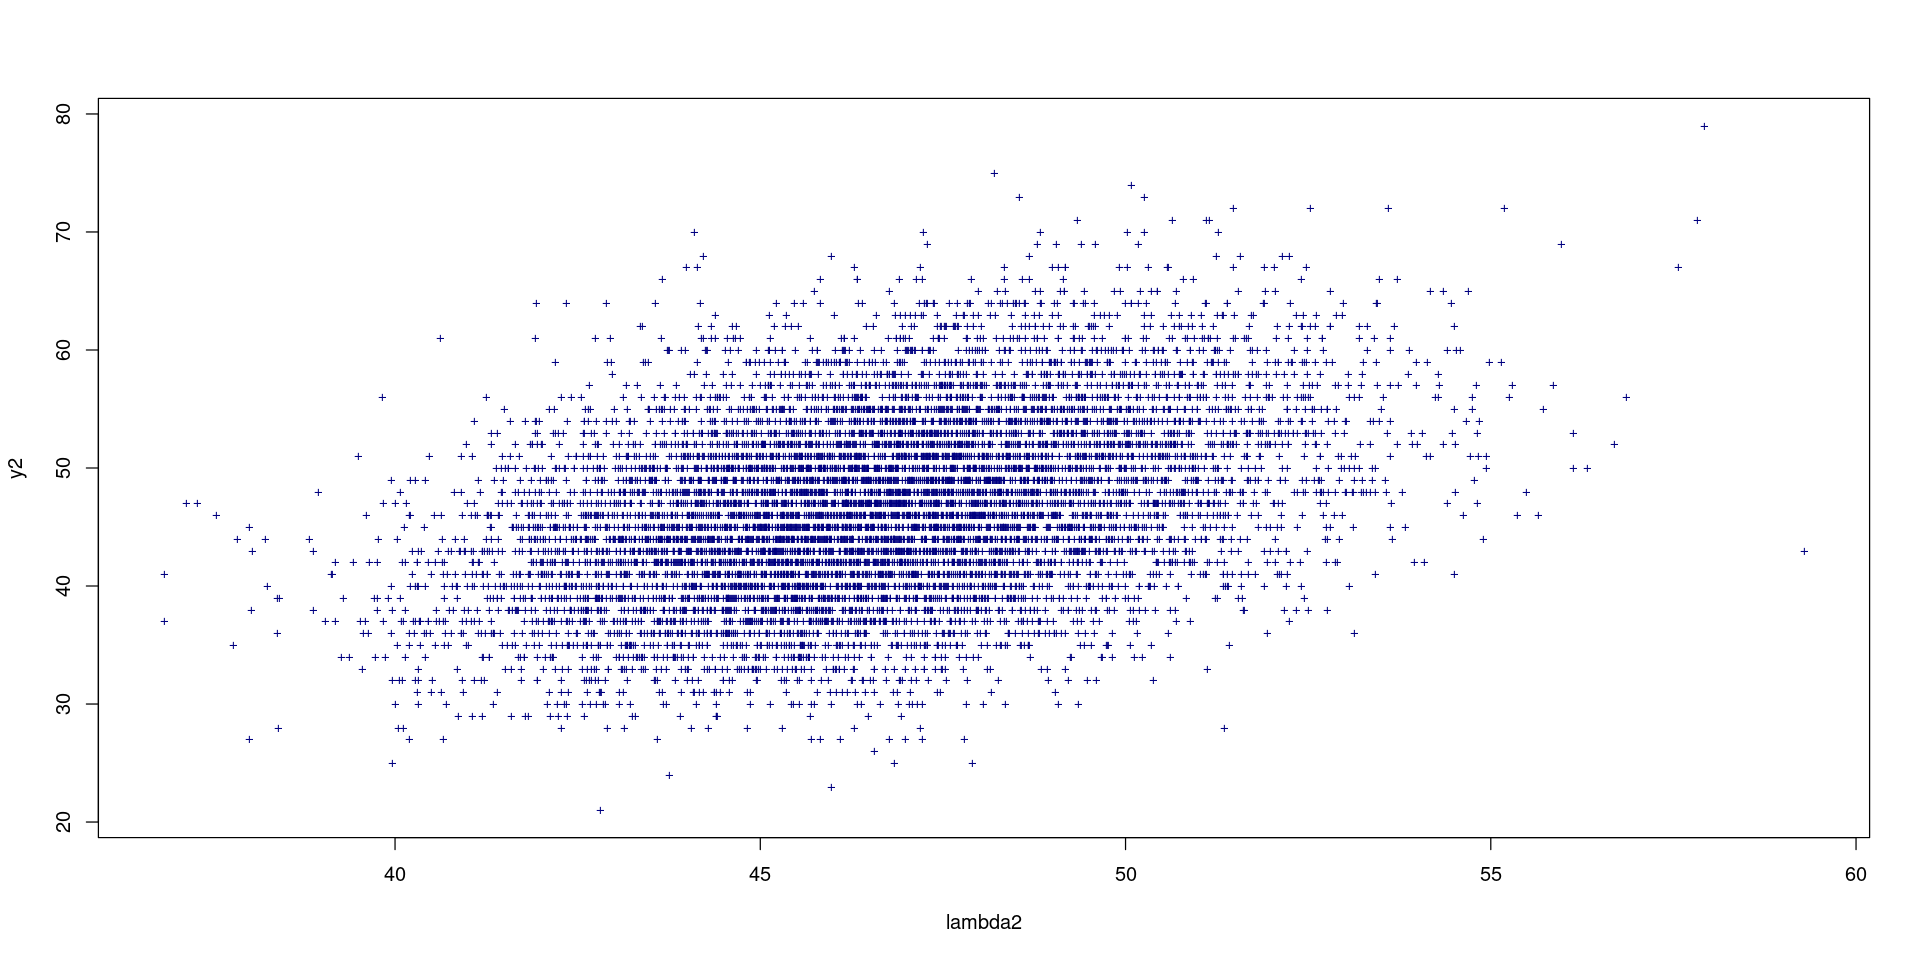

In [21]:
options(repr.plot.width=16,repr.plot.height=8)

# format our chain
chain.df <- as.data.frame( as.mcmc(chain_j) )

##(lambda1 ,y1)
# Probability plots
hist(chain.df$lambda1 , nc=100, prob=TRUE , col='darkolivegreen2',
xlab='lambda1', ylab='f(lambda1)', main='Inference on lambda1')
ty1 <- table(chain.df$y1)
barplot(ty1/sum(ty1), col='firebrick2', xlab='y1', ylab='f(y1)',
main=sprintf('Predicted counts'))

# And present/ future prediction correlations
plot(chain.df$lambda1 , chain.df$y1, xlab='lambda1', ylab='y1', main="",
pch='+', col='navy', cex=0.75)

##(lambda2 ,y2)
# Probability plots
hist(chain.df$lambda2 , nc=100, prob=TRUE , col='darkolivegreen2',
xlab='lambda2', ylab='f(lambda2)', main='Inference on lambda2')
ty2 <- table(chain.df$y2)
barplot(ty2/sum(ty2), col='firebrick2', xlab='y2', ylab='f(y2)',
main=sprintf('Predicted counts'))

# And present/ future prediction correlations
plot(chain.df$lambda2 , chain.df$y2, xlab='lambda2', ylab='y2', main="",
pch='+', col='navy', cex=0.75)

## Exercise 6
#### • analyze the data of Exercise 3 using a MCMC with JAGS (solve point b and c)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 2
   Total graph size: 7

Initializing model




Iterations = 11001:21000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

     Mean      SD  Naive SE Time-series SE
p 0.09482 0.02646 0.0002646      0.0003505
y 0.94130 0.95830 0.0095830      0.0095830

2. Quantiles for each variable:

     2.5%     25%     50%    75%  97.5%
p 0.04909 0.07648 0.09268 0.1113 0.1542
y 0.00000 0.00000 1.00000 1.0000 3.0000


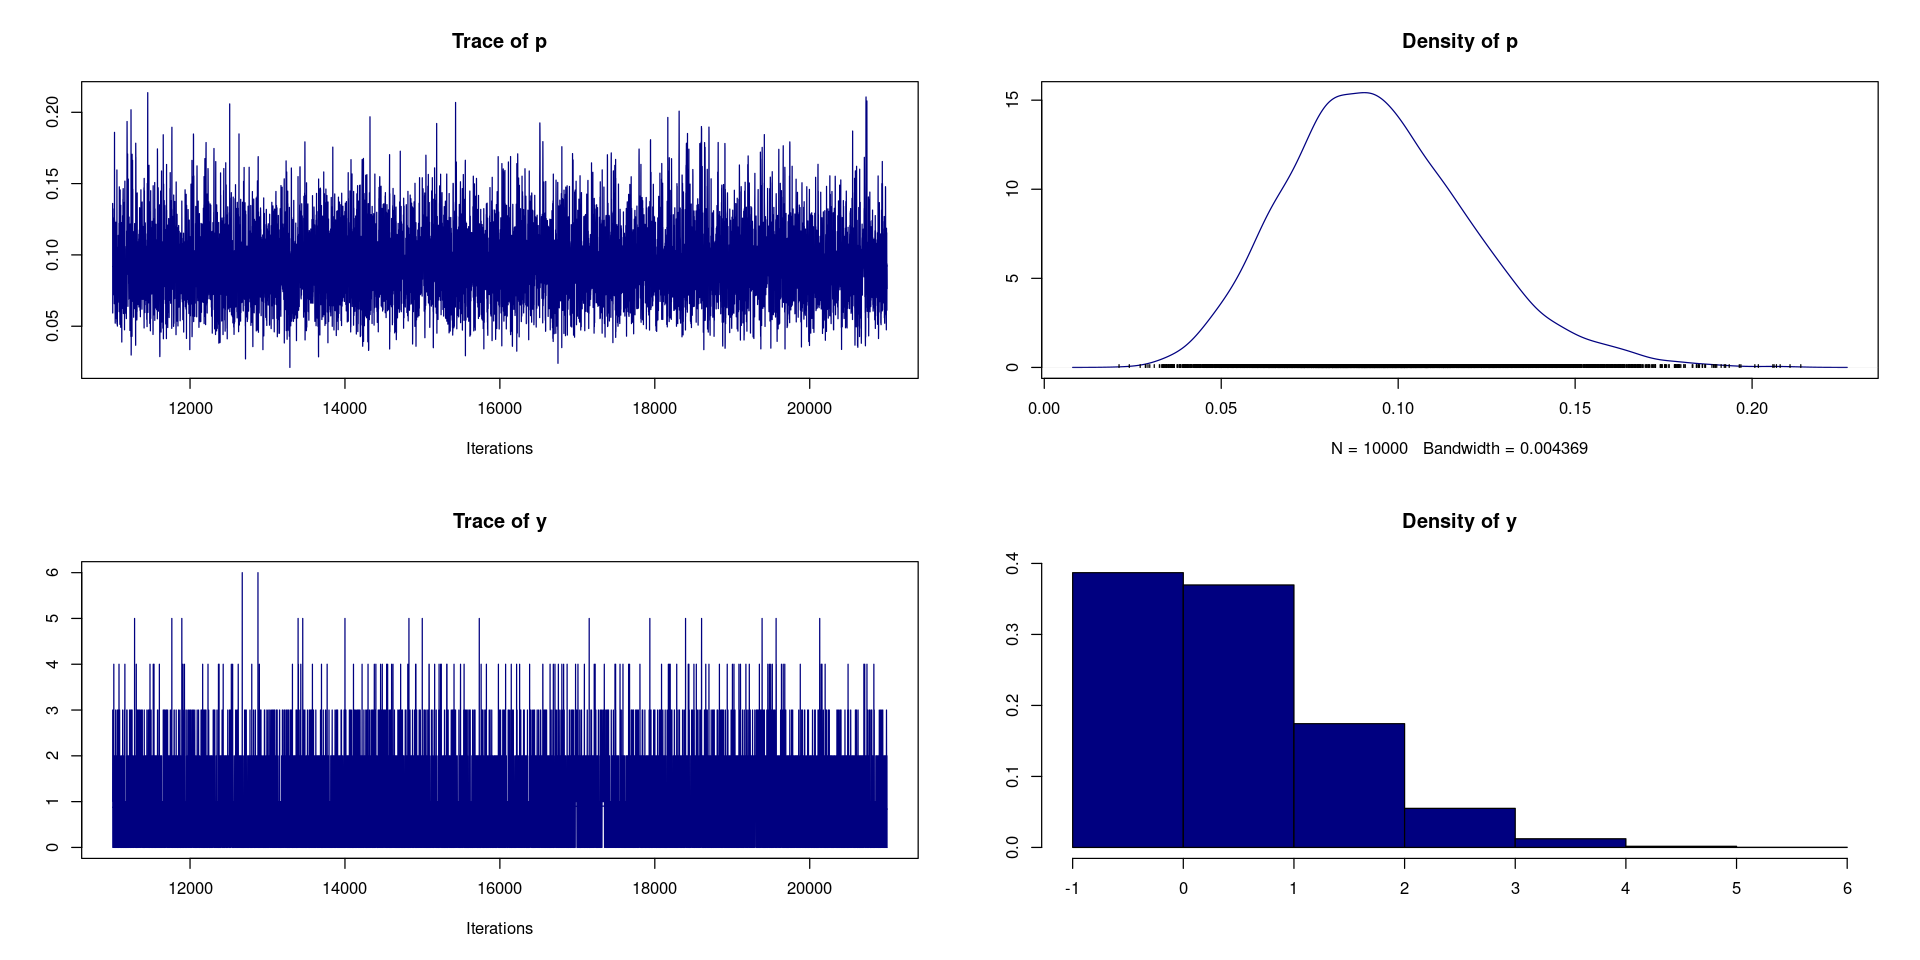

In [22]:
options(repr.plot.width=16,repr.plot.height=8)
data <- NULL
data$x <- 11  # Set of observations
data$n <- 116 # those to be considered
data$n_next <- 10 # Predictions

cat("model{
    ## liklihood : sum of the Bernoulli process is binomial distribution
    x ~ dbin(p,n)

    # Prior: beta(1, 10)
    p ~ dbeta(1, 10)

    ## postorior:  binomial
    y ~ dbin(p,n_next)
    
}", file="6.bug")

model<- "6.bug"

jm <- jags.model(model ,data)
update(jm, 10000); # Burning 10000 samples to the MCMC gods...
chain0 <- coda.samples(jm , c("p","y"), n.iter=10000)
plot(chain0 , col="navy")
summary(chain0)

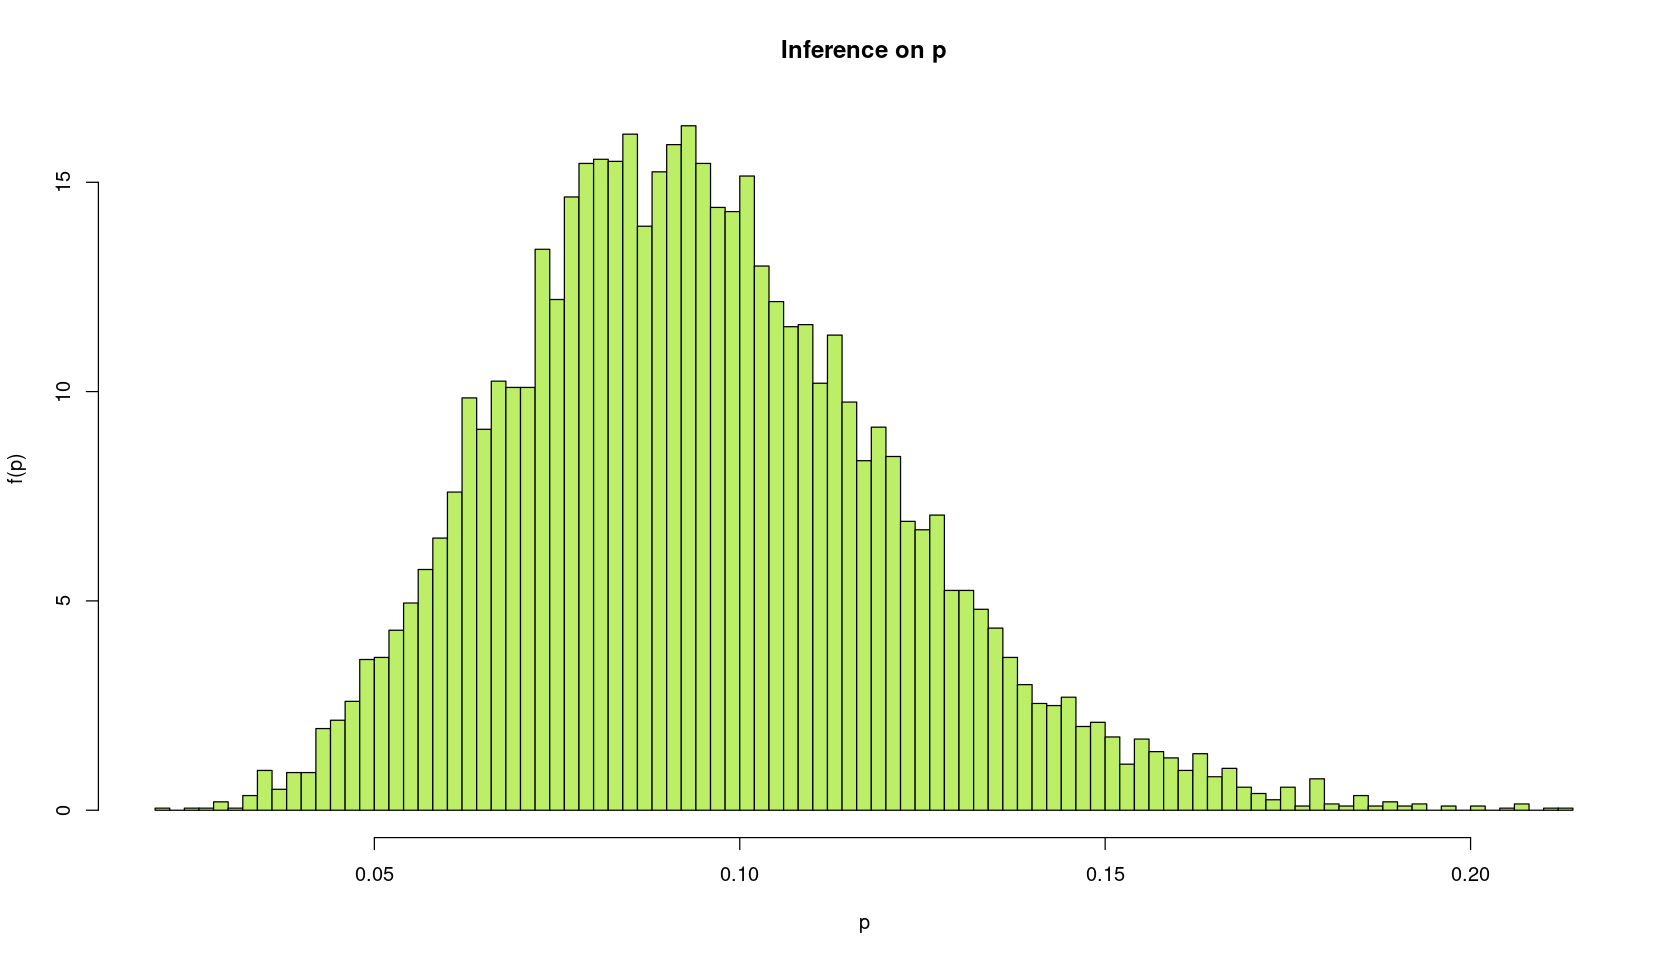

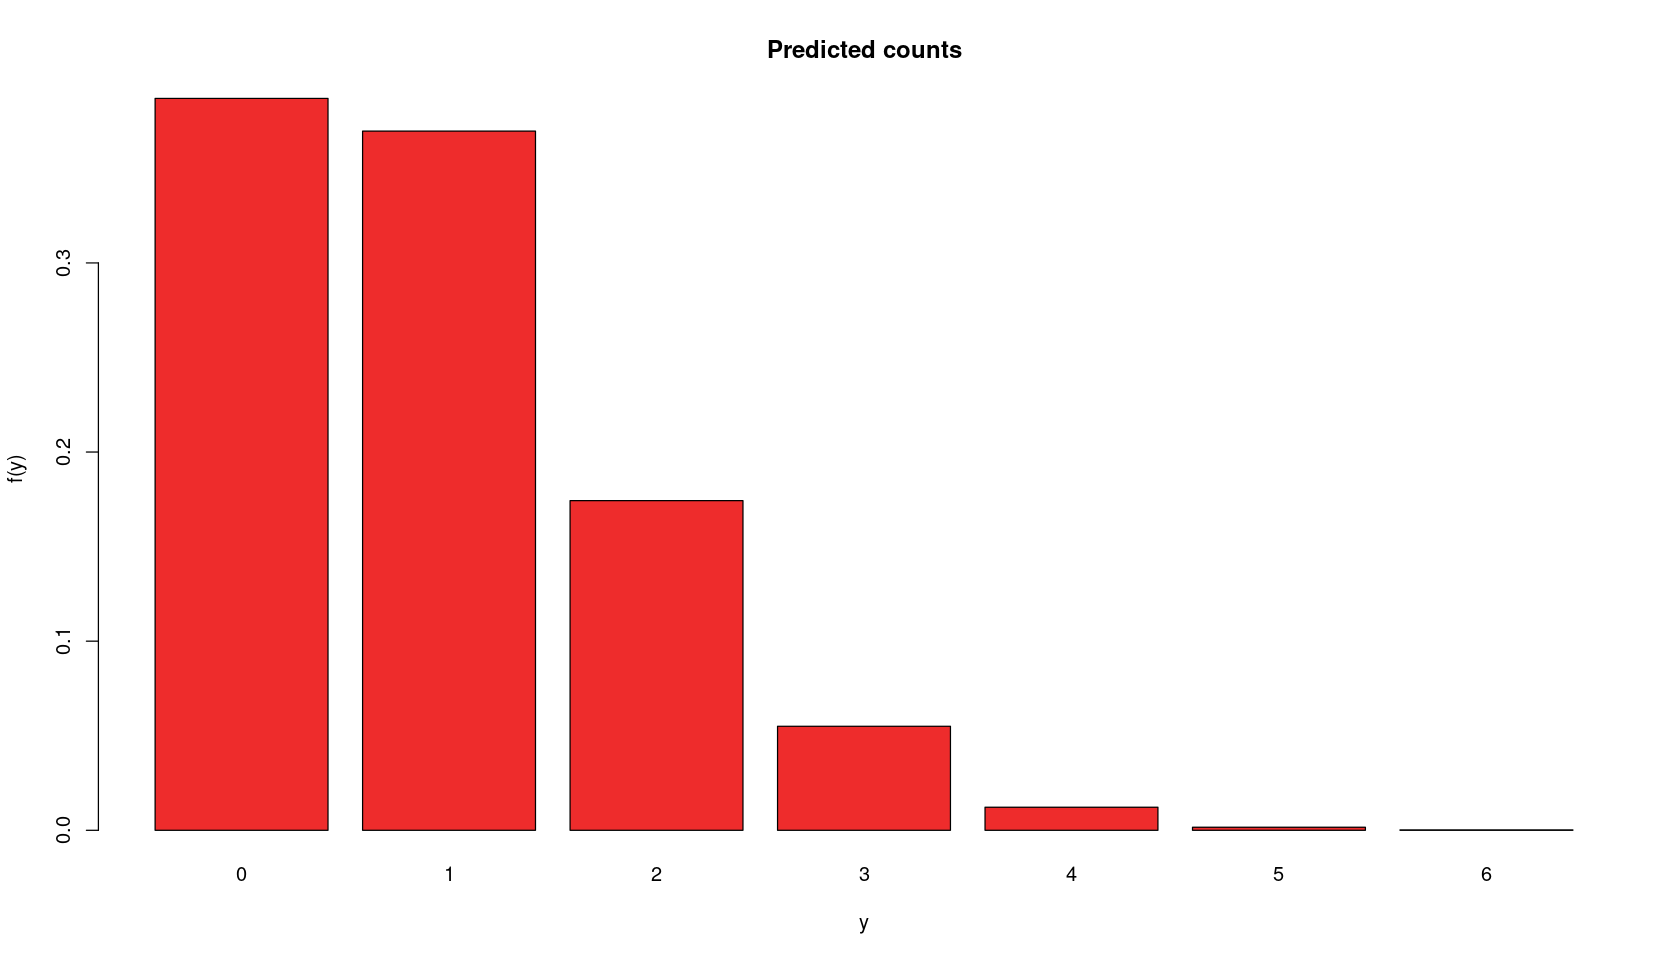

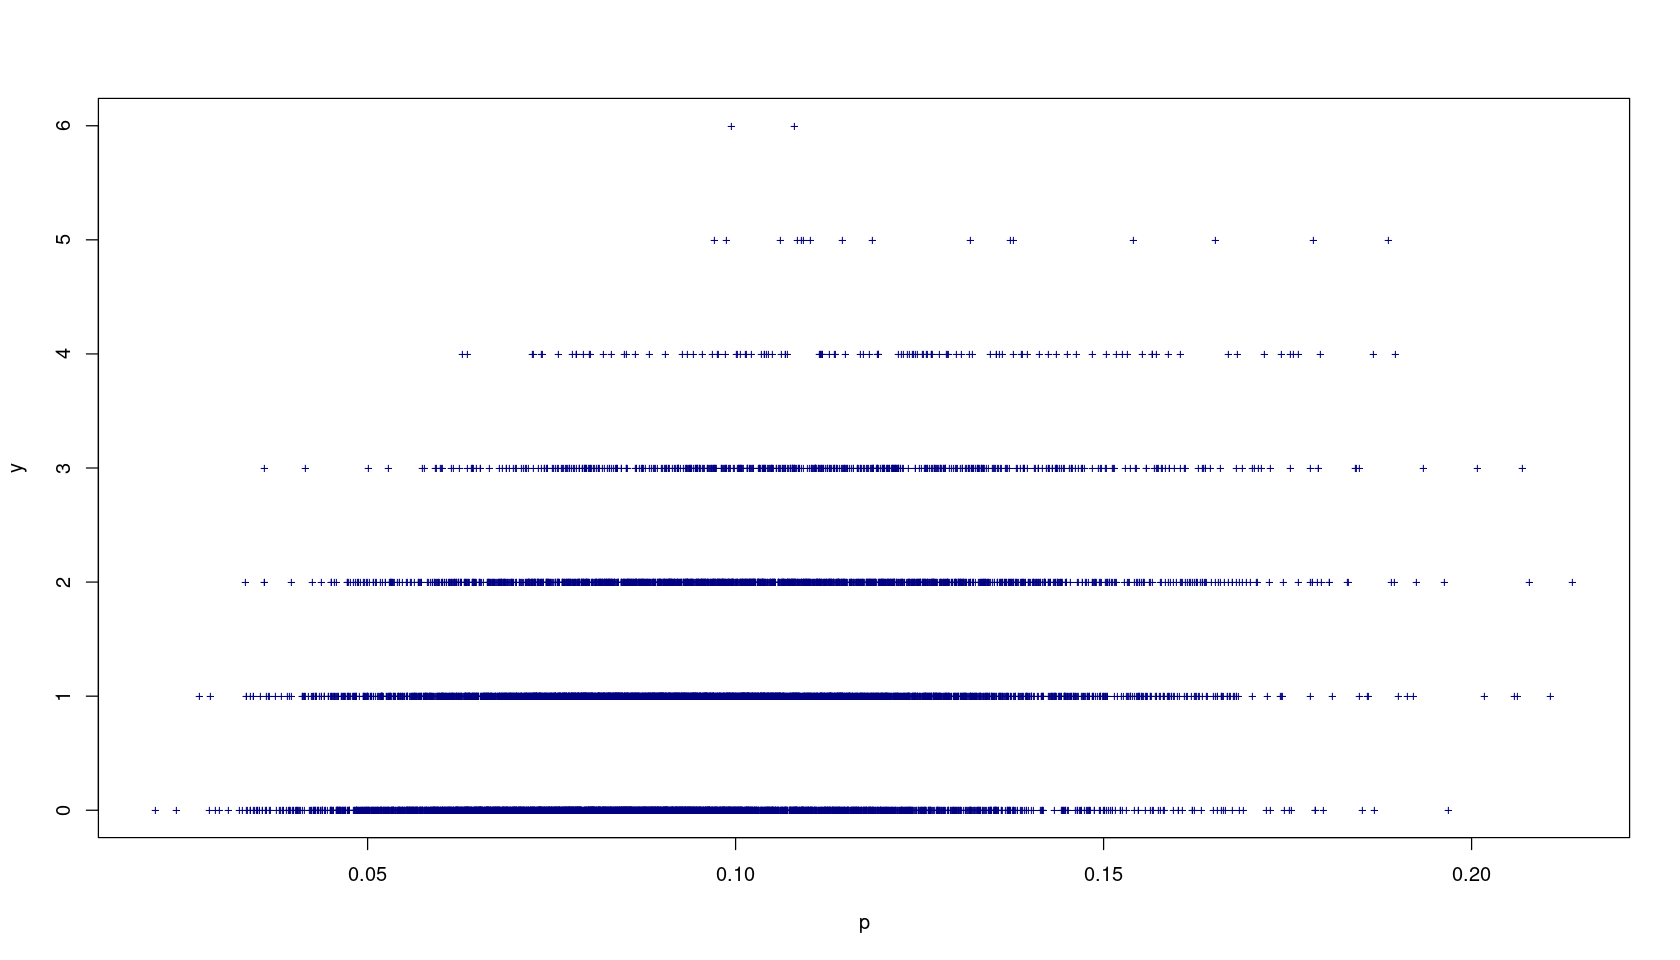

In [23]:
options(repr.plot.width=14,repr.plot.height=8)

# format our chain
chain.df <- as.data.frame( as.mcmc(chain0) )

# Probability plots
hist(chain.df$p , nc=100, prob=TRUE , col='darkolivegreen2',
xlab='p', ylab='f(p)', main='Inference on p')
ty <- table(chain.df$y)
barplot(ty/sum(ty), col='firebrick2', xlab='y', ylab='f(y)',
main=sprintf('Predicted counts'))

# And present/ future prediction correlations
plot(chain.df$p , chain.df$y, xlab='p', ylab='y', main="",
pch='+', col='navy', cex=0.75)